----

# **Análisis de Videojuegos**

**Descripción de datos**

— Name (Nombre)

— Platform (Plataforma)

— Year_of_Release (Año de lanzamiento)

— Genre (Género) 

— NA_sales (ventas en Norteamérica en millones de dólares estadounidenses) 

— EU_sales (ventas en Europa en millones de dólares estadounidenses) 

— JP_sales (ventas en Japón en millones de dólares estadounidenses) 

— Other_sales (ventas en otros países en millones de dólares estadounidenses) 

— Critic_Score (máximo de 100) 

— User_Score (máximo de 10) 

— Rating (ESRB)

Es posible que los datos de 2016 estén incompletos.

## Librerías

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt
import seaborn as sns

## Carga de datos

In [2]:
df_games = pd.read_csv('/datasets/games.csv')

## Preparación los datos

In [5]:
print(df_games.info())
print()
print(df_games.head(10))
print()
print(df_games.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None

                        name platform  year_of_release         genre  \
0                 Wii Sports      Wii           2006.0        Sports   
1          Super Mario Bros.      NES           1985.0      Platform   
2             Mario

In [6]:
new_col = []

for old_name in df_games.columns:
    name_lowered = old_name.lower()
    new_col.append(name_lowered)

df_games.columns = new_col

df_games.columns = df_games.columns.str.strip()

df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Se cambian los nombres de las columnas a minúsculas para facilidad del análisis de datos y se elimina cualquier espacio al inicio o al final de cada nombre.

In [7]:
df_games.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


### Datos duplicados

In [8]:
df_games.duplicated().sum()

0

In [9]:
df_games[df_games.duplicated(['name',], keep=False)].sort_values('name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
3862,Frozen: Olaf's Quest,DS,2013.0,Platform,0.21,0.26,0.00,0.04,NaN,NaN,NaN
3358,Frozen: Olaf's Quest,3DS,2013.0,Platform,0.27,0.27,0.00,0.05,NaN,NaN,NaN
14658,007: Quantum of Solace,PC,2008.0,Action,0.01,0.01,0.00,0.00,70.0,6.3,T
9507,007: Quantum of Solace,DS,2008.0,Action,0.11,0.01,0.00,0.01,65.0,tbd,T
3120,007: Quantum of Solace,Wii,2008.0,Action,0.29,0.28,0.01,0.07,54.0,7.5,T
...,...,...,...,...,...,...,...,...,...,...,...
12648,pro evolution soccer 2011,PC,2010.0,Sports,0.00,0.05,0.00,0.01,79.0,NaN,NaN
15612,uDraw Studio: Instant Artist,X360,2011.0,Misc,0.01,0.01,0.00,0.00,54.0,5.7,E
8280,uDraw Studio: Instant Artist,Wii,2011.0,Misc,0.06,0.09,0.00,0.02,NaN,tbd,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN


In [10]:
df_games[df_games.duplicated(['name', 'platform'], keep=False)].sort_values('name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T
1745,Sonic the Hedgehog,PS3,2006.0,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [11]:
df_games[df_games.duplicated(['name', 'platform', 'year_of_release'], keep=False)].sort_values('name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Al revisar los valores duplicados vemos que solamente dos juegos se repiten en cuando a nombre, consola y año. El juego en el index 16230 tiene unas ventas nada significativas, que puede eliminarse completamente la fila sin afectar el resultado. Los otros dos juegos repetidos son de 1993 donde no se tiene nombre ni género ni calificación. Para el análisis se eliminarán estas dos filas puesto que no aportarán datos relevantes para el estudio por tratarse de un juego en 1993 sin calificación alguna.

In [12]:
df_games = df_games.drop([16230, 659, 14244])
df_games[df_games.duplicated(['name', 'platform', 'year_of_release'], keep=False)].sort_values('name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


### Datos faltantes

In [13]:
faltantes = df_games.isna().sum().reset_index()
faltantes.columns = ['columna', 'num_faltantes']
faltantes['%_faltantes'] = faltantes['num_faltantes'] / df_games.shape[0]
faltantes.sort_values('%_faltantes', ascending=False)

,columna,num_faltantes,%_faltantes
8,critic_score,8576,0.513164
10,rating,6764,0.404739
9,user_score,6699,0.400850
2,year_of_release,269,0.016096
0,name,0,0.000000
1,platform,0,0.000000
3,genre,0,0.000000
4,na_sales,0,0.000000
5,eu_sales,0,0.000000
6,jp_sales,0,0.000000


En una primera revisión vemos que en las columnas de calificación ('critic_score', 'user_score') y de calificación ('rating') hace falta un porcentaje bastante elevado de datos. De entrada, se puede considerar que estas columnas no están aportando unos datos relevantes por la cantidad de valores ausentes. Sin embargo, se hará un análisis más detallado de cada columna para determinar cómo proceder.

In [14]:
no_year = df_games[df_games['year_of_release'].isna()]
no_year
print(no_year.groupby('platform')['genre'].count())

platform
2600    17
3DS      8
DS      30
GB       1
GBA     11
GC      14
N64      3
PC      17
PS       7
PS2     34
PS3     25
PSP     16
PSV      1
Wii     34
X360    30
XB      21
Name: genre, dtype: int64


In [15]:
print(df_games.groupby('platform')['year_of_release'].count())
print()
print(df_games.groupby('platform')['year_of_release'].median())
print()
print(df_games.groupby('platform')['year_of_release'].mean())

platform
2600     116
3DO        3
3DS      512
DC        52
DS      2121
GB        97
GBA      811
GC       542
GEN       27
GG         1
N64      316
NES       98
NG        12
PC       957
PCFX       1
PS      1190
PS2     2127
PS3     1305
PS4      392
PSP     1193
PSV      429
SAT      173
SCD        6
SNES     239
TG16       2
WS         6
Wii     1286
WiiU     147
X360    1232
XB       803
XOne     247
Name: year_of_release, dtype: int64

platform
2600    1982.0
3DO     1995.0
3DS     2013.0
DC      2000.0
DS      2008.0
GB      1997.0
GBA     2003.0
GC      2003.0
GEN     1993.0
GG      1992.0
N64     1999.0
NES     1986.5
NG      1994.5
PC      2010.0
PCFX    1996.0
PS      1998.0
PS2     2005.0
PS3     2011.0
PS4     2015.0
PSP     2009.0
PSV     2014.0
SAT     1996.0
SCD     1994.0
SNES    1994.0
TG16    1995.0
WS      2000.0
Wii     2009.0
WiiU    2013.0
X360    2010.0
XB      2004.0
XOne    2015.0
Name: year_of_release, dtype: float64

platform
2600    1982.137931
3DO     1

<AxesSubplot:xlabel='year_of_release'>

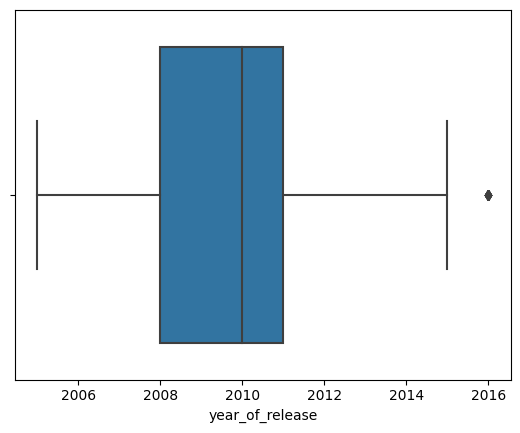

In [16]:
sns.boxplot(df_games[df_games['platform'] == 'X360']['year_of_release'])

Después de analizar los datos respecto al año de lanzamiento, encontramos que la mejor opción es agrupar los datos por consola ('platform') y reemplazar los valores por mediana porque, aunque la media y la mediana son muy parecidas, la mejor opción es la mediana para incluir los valores atípicos.

In [17]:
df_games['year_of_release'] = df_games.groupby('platform')['year_of_release'].transform(lambda x: x.fillna(x.median()))
print(df_games.isna().sum())

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64


In [18]:
no_crit_score = df_games[df_games['critic_score'].isna()]
print(no_crit_score.groupby('year_of_release')['platform'].count().sort_values(ascending=False))
print()
print(no_crit_score.groupby('platform')['genre'].count().sort_values(ascending=False))
print()
print(no_crit_score.groupby('genre')['platform'].count().sort_values(ascending=False))

year_of_release
2009.0    802
2010.0    764
2008.0    733
2011.0    645
2007.0    505
2006.0    386
2015.0    381
1998.0    354
2012.0    332
2014.0    320
1999.0    302
2005.0    295
2013.0    277
1997.0    273
2016.0    270
1996.0    255
1995.0    219
2000.0    207
2004.0    203
2002.0    202
2003.0    196
2001.0    156
1994.0    120
1993.0     60
1982.0     53
1981.0     46
1992.0     42
1991.0     41
1986.0     21
1989.0     17
1983.0     17
1987.0     16
1990.0     16
1988.0     14
1984.0     14
1985.0     13
1980.0      9
Name: platform, dtype: int64

platform
DS      1434
PS       997
PS2      863
PSP      747
Wii      735
PS3      511
GBA      384
3DS      352
X360     346
N64      319
PSV      310
PC       259
SNES     239
SAT      173
PS4      140
2600     133
GC       108
XB        99
NES       98
GB        98
XOne      78
WiiU      57
DC        38
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: genre, dtype: int6

In [19]:
print(df_games.groupby('platform')['critic_score'].median())
print()
print(df_games.groupby('platform')['critic_score'].mean())

platform
2600     NaN
3DO      NaN
3DS     68.0
DC      88.0
DS      66.0
GB       NaN
GBA     69.0
GC      70.0
GEN      NaN
GG       NaN
N64      NaN
NES      NaN
NG       NaN
PC      78.0
PCFX     NaN
PS      73.5
PS2     70.0
PS3     73.0
PS4     73.0
PSP     68.0
PSV     71.0
SAT      NaN
SCD      NaN
SNES     NaN
TG16     NaN
WS       NaN
Wii     65.0
WiiU    73.5
X360    71.0
XB      72.0
XOne    76.0
Name: critic_score, dtype: float64

platform
2600          NaN
3DO           NaN
3DS     67.101190
DC      87.357143
DS      63.761506
GB            NaN
GBA     67.372146
GC      69.488839
GEN           NaN
GG            NaN
N64           NaN
NES           NaN
NG            NaN
PC      75.928671
PCFX          NaN
PS      71.515000
PS2     68.727273
PS3     70.367521
PS4     72.091270
PSP     67.424242
PSV     70.791667
SAT           NaN
SCD           NaN
SNES          NaN
TG16          NaN
WS            NaN
Wii     62.823932
WiiU    70.733333
X360    68.616812
XB      69.859310
XOn

In [20]:
print(df_games.groupby('genre')['critic_score'].median())
print()
print(df_games.groupby('genre')['critic_score'].mean())

genre
Action          68.0
Adventure       66.0
Fighting        72.0
Misc            69.0
Platform        69.0
Puzzle          70.0
Racing          69.0
Role-Playing    74.0
Shooter         73.0
Simulation      70.0
Sports          75.0
Strategy        73.0
Name: critic_score, dtype: float64

genre
Action          66.629101
Adventure       65.331269
Fighting        69.217604
Misc            66.619503
Platform        68.058350
Puzzle          67.424107
Racing          67.963612
Role-Playing    72.652646
Shooter         70.181144
Simulation      68.619318
Sports          71.958927
Strategy        72.086093
Name: critic_score, dtype: float64


<AxesSubplot:xlabel='critic_score'>

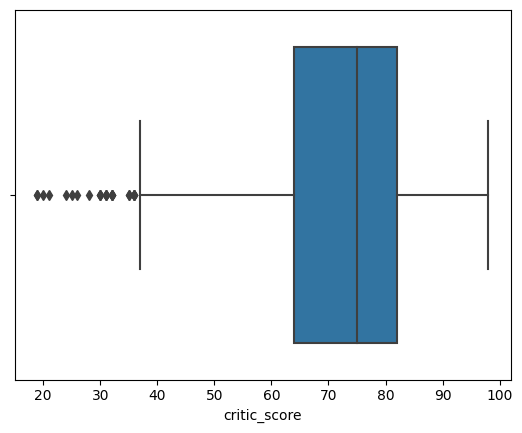

In [21]:
sns.boxplot(df_games[df_games['genre'] == 'Sports']['critic_score'])

<AxesSubplot:xlabel='critic_score'>

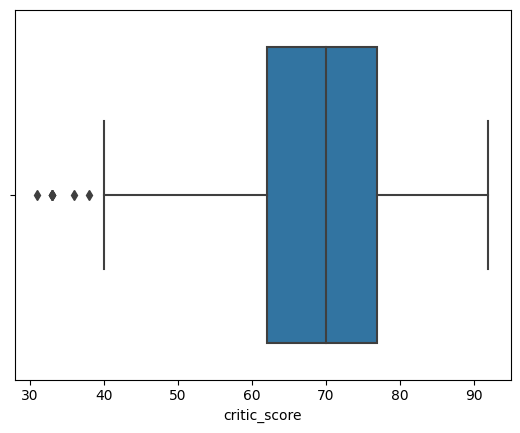

In [22]:
sns.boxplot(df_games[df_games['genre'] == 'Simulation']['critic_score'])

In [23]:
df_games['critic_score'] = df_games.groupby('genre')['critic_score'].transform(lambda x: x.fillna(x.median()))
print(df_games.isna().sum())

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score         6699
rating             6764
dtype: int64


Se analizan los valores faltantes en la columna 'critic_score'. Primero se revisa si existe alguna tendencia por año, por plataforma o por género para los valores faltantes. No se encuentra alguna relación relevante. Luego revisamos todo el DataFrame por 'platform' y se encuentra que algunas consolas no tienen resultados en 'critic_score'. Podríamos suponer que esto se debe a la antigüedad de las consolas. Sin embargo, no sería correcto cambiar estos valores por 0 dependiendo del tipo de consola.

Se realiza el análisis del 'critic_score' por el género de cada juego, un criterio más neutral, y vemos que podríamos reemplazar los valores faltantes por género utilizando la mediana (tenemos valores atípicos en cada género). Se decide proceder de esta forma puesto que la calificación de la crítica está más relacionada al juego que a la consola en sí, y este criterio está más relacionado al género que al tipo de consola.

In [24]:
print(df_games['user_score'].unique())

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


In [25]:
tbd_user_sc = df_games[df_games['user_score'] == 'tbd']
tbd_user_sc

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,75.0,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,75.0,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,2003.0,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,70.0,tbd,E


In [26]:
print(tbd_user_sc.groupby('platform')['genre'].count().sort_values(ascending=False))
print()
print(tbd_user_sc.groupby('genre')['platform'].count().sort_values(ascending=False))
print()
print(tbd_user_sc.groupby('year_of_release')['genre'].count().sort_values(ascending=False))

platform
DS      756
Wii     440
GBA     262
PS2     240
XB      150
PSP     123
GC      103
PS3      87
X360     84
3DS      56
PC       49
PS       45
XOne     11
PSV       7
PS4       6
WiiU      5
Name: genre, dtype: int64

genre
Misc            449
Sports          413
Action          376
Simulation      237
Racing          233
Puzzle          211
Adventure       159
Platform        139
Shooter          99
Fighting         39
Strategy         39
Role-Playing     30
Name: platform, dtype: int64

year_of_release
2009.0    422
2008.0    338
2010.0    332
2011.0    217
2007.0    192
2002.0    192
2005.0    125
2006.0    124
2004.0    111
2003.0    102
2001.0     82
2000.0     43
2015.0     38
2016.0     34
2012.0     24
2014.0     21
2013.0     17
1999.0      8
1998.0      1
1997.0      1
Name: genre, dtype: int64


In [27]:
print(df_games.groupby('user_score')['genre'].count().sort_values(ascending=False))

user_score
tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.5       2
1.9       2
0.2       2
9.7       1
0         1
Name: genre, Length: 96, dtype: int64


Después del análisis, no se evidencia ninguna tendencia clara respecto a los valores 'tbd' en la columna `user_score`. Teniendo en cuenta esto, se decide convertir los valores 'tbd' a NaN para manejarlos como valores ausentes regulares.

In [28]:
df_games['user_score'] = df_games['user_score'].replace('tbd', np.nan)
print(df_games.isna().sum())
print()
print(df_games['user_score'].unique())

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score         9123
rating             6764
dtype: int64

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' '8.8' '6.9' '9.4'
 '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7' '4.1'
 '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3' '4.7'
 '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8' '1.8'
 '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2' '2.3'
 '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


In [29]:
df_games['user_score'] = pd.to_numeric(df_games['user_score'], errors='coerce')

print(df_games.groupby('genre')['user_score'].median())
print()
print(df_games.groupby('genre')['user_score'].mean())

genre
Action          7.4
Adventure       7.6
Fighting        7.6
Misc            7.1
Platform        7.7
Puzzle          7.5
Racing          7.4
Role-Playing    7.8
Shooter         7.4
Simulation      7.5
Sports          7.4
Strategy        7.8
Name: user_score, dtype: float64

genre
Action          7.054044
Adventure       7.133000
Fighting        7.302506
Misc            6.819362
Platform        7.301402
Puzzle          7.175000
Racing          7.036193
Role-Playing    7.619515
Shooter         7.041883
Simulation      7.134593
Sports          6.962523
Strategy        7.295177
Name: user_score, dtype: float64


<AxesSubplot:xlabel='user_score'>

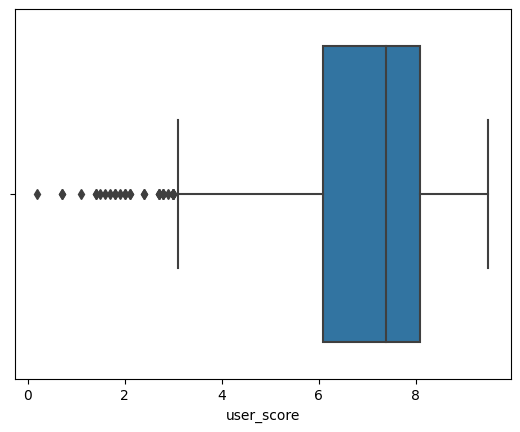

In [30]:
sns.boxplot(df_games[df_games['genre'] == 'Sports']['user_score'])

<AxesSubplot:xlabel='user_score'>

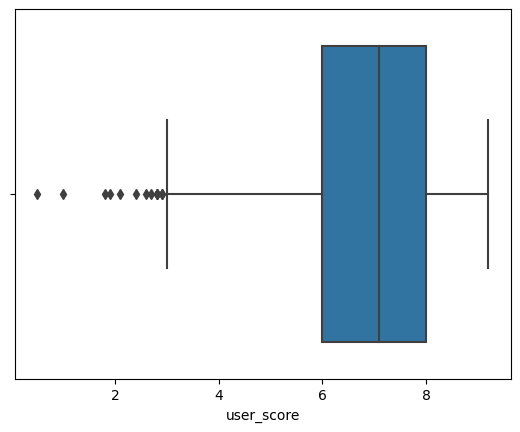

In [31]:
sns.boxplot(df_games[df_games['genre'] == 'Misc']['user_score'])

In [32]:
df_games['user_score'] = df_games.groupby('genre')['user_score'].transform(lambda x: x.fillna(x.median()))
print(df_games.isna().sum())

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6764
dtype: int64


Se analizan los valores faltantes en la columna 'user_score'. Se encuentra una cantidad importante de valores 'tbd'. Primero se revisa si existe alguna tendencia por año, por plataforma o por género para estos valores. No se encuentra alguna relación relevante y, por lo tanto, se cambian a valores 'NaN' para tratarlos como valores ausentes regulares.

Se realiza el análisis del 'user_score' por el género de cada juego, y vemos que podríamos reemplazar los valores faltantes por género utilizando la mediana (tenemos valores atípicos en cada género).

In [33]:
print(df_games['rating'].unique())

['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


In [34]:
no_rating = df_games[df_games['rating'].isna()]
no_rating

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,69.0,7.7,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,74.0,7.8,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,70.0,7.5,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,73.0,7.4,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,70.0,7.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,68.0,7.4,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,75.0,7.4,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,66.0,7.6,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,69.0,7.7,NaN


In [35]:
print(no_rating.groupby('year_of_release')['platform'].count().sort_values(ascending=False))
print()
print(no_rating.groupby('platform')['genre'].count().sort_values(ascending=False))
print()
print(no_rating.groupby('genre')['platform'].count().sort_values(ascending=False))

year_of_release
2010.0    464
2008.0    458
2011.0    441
2009.0    432
2007.0    376
1998.0    350
2006.0    328
1999.0    299
2012.0    298
2015.0    291
1997.0    271
1996.0    256
2005.0    242
2014.0    236
2013.0    231
2016.0    222
1995.0    219
2000.0    202
2002.0    174
2003.0    167
2004.0    166
2001.0    143
1994.0    120
1993.0     60
1982.0     53
1981.0     46
1991.0     41
1992.0     41
1986.0     21
1989.0     17
1983.0     17
1990.0     16
1987.0     16
1988.0     14
1984.0     14
1985.0     13
1980.0      9
Name: platform, dtype: int64

platform
PS      989
DS      878
PS2     680
PSP     665
PS3     379
N64     319
Wii     318
GBA     300
3DS     292
PSV     279
SNES    239
X360    210
PC      200
SAT     173
PS4     137
2600    133
NES      98
GB       98
XB       91
GC       87
XOne     61
WiiU     42
DC       38
GEN      27
NG       12
SCD       6
WS        6
3DO       3
TG16      2
PCFX      1
GG        1
Name: genre, dtype: int64

genre
Action          1181
M

In [36]:
print(df_games.groupby('rating')['genre'].count().sort_values(ascending=False))

rating
E       3989
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: genre, dtype: int64


Después de analizar los datos para los valores ausentes de 'rating' vemos que no hay una tendencia clara y se decide cambiar estos valores ausentes por 'RP (Rating Pending)' para poder trabajar con los datos.

In [37]:
df_games['rating'] = df_games['rating'].fillna('RP')
print(df_games.isna().sum())

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64


In [38]:
df_games['total_sales'] = df_games['na_sales'] +df_games['eu_sales'] + df_games['jp_sales'] + df_games['other_sales']
print(df_games.info())
print()
df_games

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16712 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16712 non-null  object 
 2   year_of_release  16712 non-null  float64
 3   genre            16712 non-null  object 
 4   na_sales         16712 non-null  float64
 5   eu_sales         16712 non-null  float64
 6   jp_sales         16712 non-null  float64
 7   other_sales      16712 non-null  float64
 8   critic_score     16712 non-null  float64
 9   user_score       16712 non-null  float64
 10  rating           16712 non-null  object 
 11  total_sales      16712 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.7+ MB
None



,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,69.0,7.7,RP,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,74.0,7.8,RP,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,68.0,7.4,RP,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,75.0,7.4,RP,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,66.0,7.6,RP,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,69.0,7.7,RP,0.01


Se crea la columna `total_sales` con el total de las ventas para cada juego. Se suman los valores de venta en Norte America, Europa, Japón y otras regiones.

## Análisis de los datos

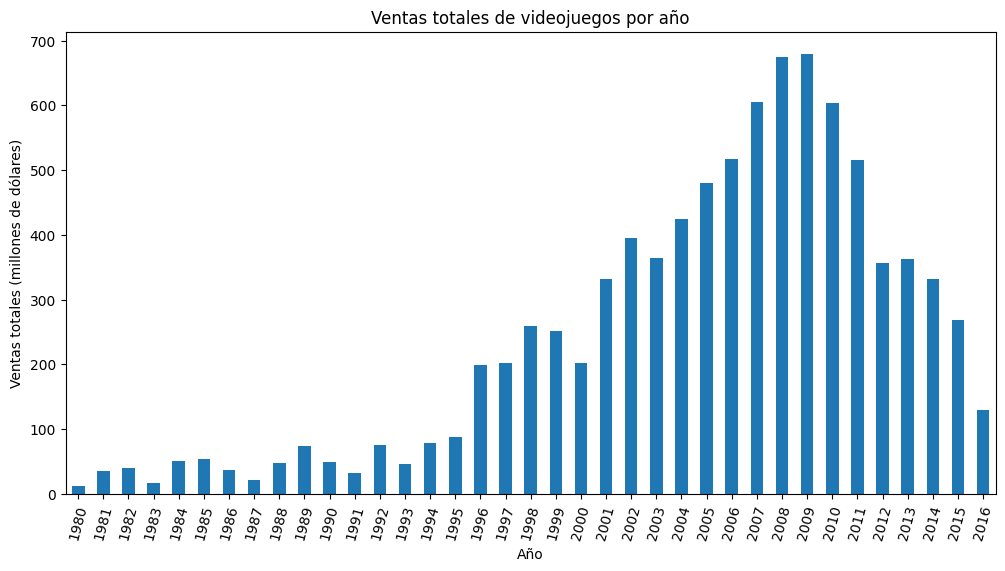

In [39]:
df_games['year_of_release'] = df_games['year_of_release'].astype(int)
ventas_por_año = df_games.groupby('year_of_release')['total_sales'].sum()
ventas_por_año.plot(kind='bar', 
                    title='Ventas totales de videojuegos por año', 
                    xlabel='Año', 
                    ylabel='Ventas totales (millones de dólares)', 
                    figsize=(12, 6), 
                    rot=75
                   )
plt.show()

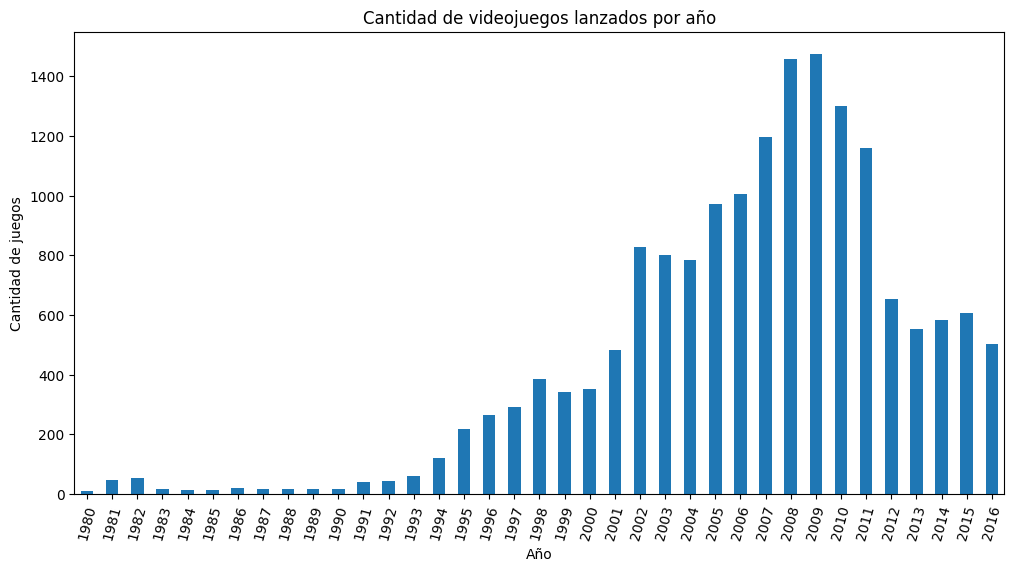

In [40]:
juegos_por_año = df_games.groupby('year_of_release')['genre'].count()
juegos_por_año.plot(kind='bar', 
                    title='Cantidad de videojuegos lanzados por año', 
                    xlabel='Año', 
                    ylabel='Cantidad de juegos', 
                    figsize=(12, 6), 
                    rot=75
                   )
plt.show()

Vemos que la mayor cantidad de videojuegos fueron lanzados entre 2002 y 2012, y tenemos un pico en los años 2008 y 2009, donde se lanzaron 1400 videojuegos por año. Estos datos coinciden con las ventas totales por año, donde vemos un pico de ventas en 2008 y 2009 con 700 millones de dólares aproximadamente.

Para calcular la vida util promedio de las consolas, y cada cuánto aparece una consola nueva, vamos a revisar los datos desde 1996 en adelante, que es cuándo comienza el auge de los videojuegos.

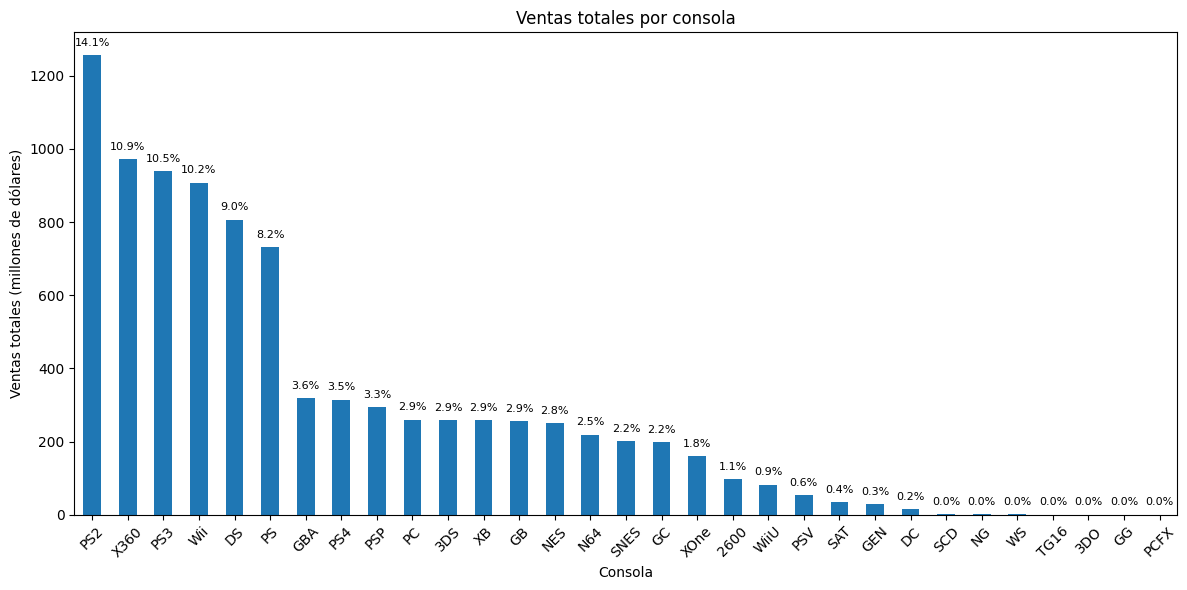

In [41]:
ventas_por_consola = df_games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
total_ventas = ventas_por_consola.sum()
porcentajes1 = (ventas_por_consola / total_ventas) * 100
ax1 = ventas_por_consola.plot(kind='bar', title='Ventas totales por consola', 
                             xlabel='Consola', 
                             ylabel='Ventas totales (millones de dólares)', 
                             figsize=(12, 6) 
                            )

for i, (valor, porcentaje) in enumerate(zip(ventas_por_consola, porcentajes1)):
  ax1.text(i, valor + 20, f'{porcentaje:.1f}%', 
          ha='center', 
          va='bottom', 
          fontsize=8 
         )



plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

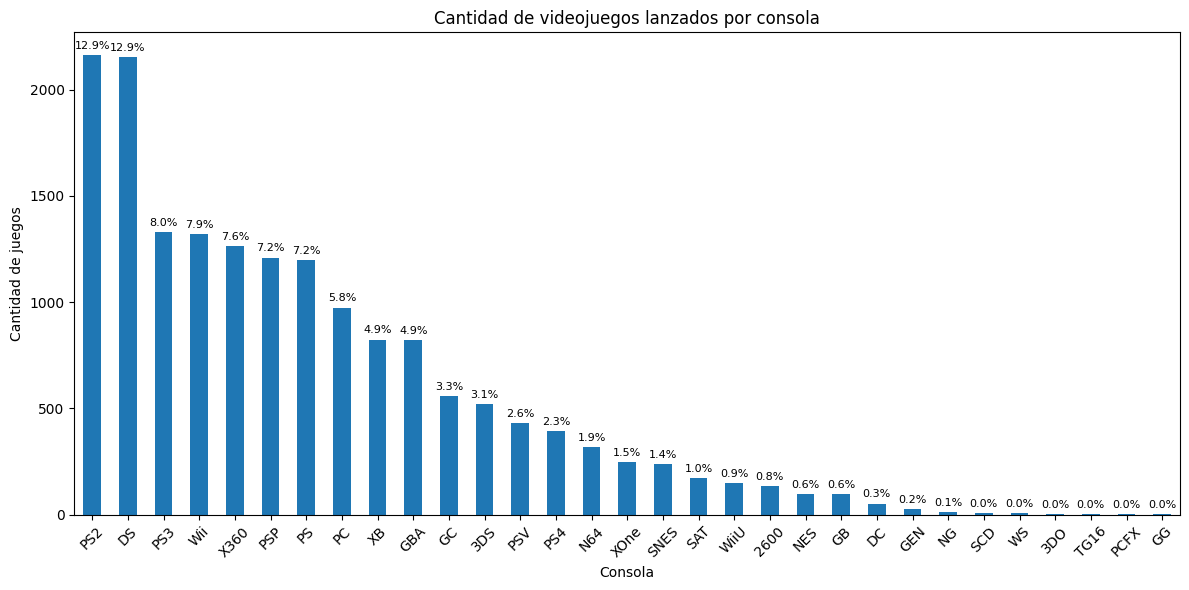

In [42]:
juegos_por_consola = df_games.groupby('platform')['genre'].count().sort_values(ascending=False)
total_juegos = juegos_por_consola.sum()
porcentajes2 = (juegos_por_consola / total_juegos) * 100
ax2 = juegos_por_consola.plot(kind='bar', title='Cantidad de videojuegos lanzados por consola', 
                             xlabel='Consola', 
                             ylabel='Cantidad de juegos', 
                             figsize=(12, 6) 
                            )

for i, (valor, porcentaje) in enumerate(zip(juegos_por_consola, porcentajes2)):
  ax2.text(i, valor + 20, f'{porcentaje:.1f}%', 
          ha='center', 
          va='bottom', 
          fontsize=8 
         )



plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Vamos a analizar el comportamiento de videojuegos para las 10 primeras consolas que representan cerca del 80% del total de videojuegos lanzados para todas las consolas y acumulan el mayor porcentaje de ventas por consola.

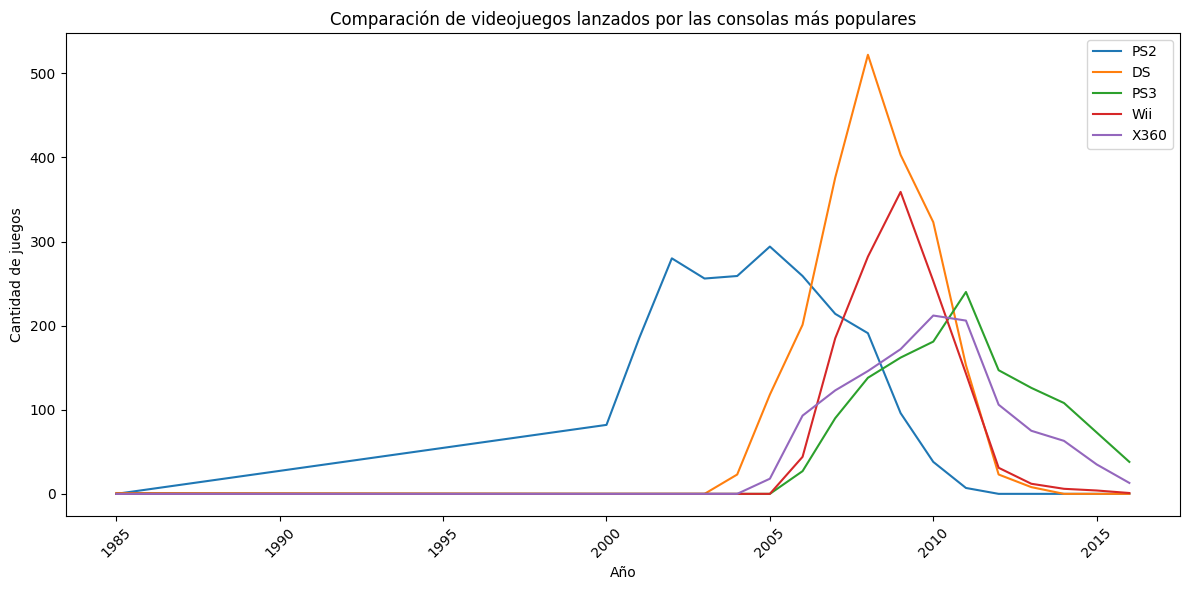

In [43]:
PS2 = df_games[df_games['platform'] == 'PS2']
PS2_año = PS2.groupby('year_of_release')['genre'].count()

DS = df_games[df_games['platform'] == 'DS']
DS_año = DS.groupby('year_of_release')['genre'].count()

PS3 = df_games[df_games['platform'] == 'PS3']
PS3_año = PS3.groupby('year_of_release')['genre'].count()

Wii = df_games[df_games['platform'] == 'Wii']
Wii_año = Wii.groupby('year_of_release')['genre'].count()

X360 = df_games[df_games['platform'] == 'X360']
X360_año = X360.groupby('year_of_release')['genre'].count()

PSP = df_games[df_games['platform'] == 'PSP']
PSP_año = PSP.groupby('year_of_release')['genre'].count()

PS = df_games[df_games['platform'] == 'PS']
PS_año = PS.groupby('year_of_release')['genre'].count()

PC = df_games[df_games['platform'] == 'PC']
PC_año = PC.groupby('year_of_release')['genre'].count()

XB = df_games[df_games['platform'] == 'XB']
XB_año = XB.groupby('year_of_release')['genre'].count()

GBA = df_games[df_games['platform'] == 'GBA']
GBA_año = GBA.groupby('year_of_release')['genre'].count()

consolas_por_año_1 = pd.DataFrame({'PS2': PS2_año, 
                                 'DS': DS_año, 
                                 'PS3': PS3_año, 
                                 'Wii': Wii_año, 
                                 'X360': X360_año,
                                }).fillna(0)

consolas_por_año_1.plot(kind='line', 
                      figsize=(12, 6), 
                      title='Comparación de videojuegos lanzados por las consolas más populares', 
                      xlabel='Año', 
                      ylabel='Cantidad de juegos', 
                      rot=45 
                     )
plt.legend()
plt.tight_layout()
plt.show()

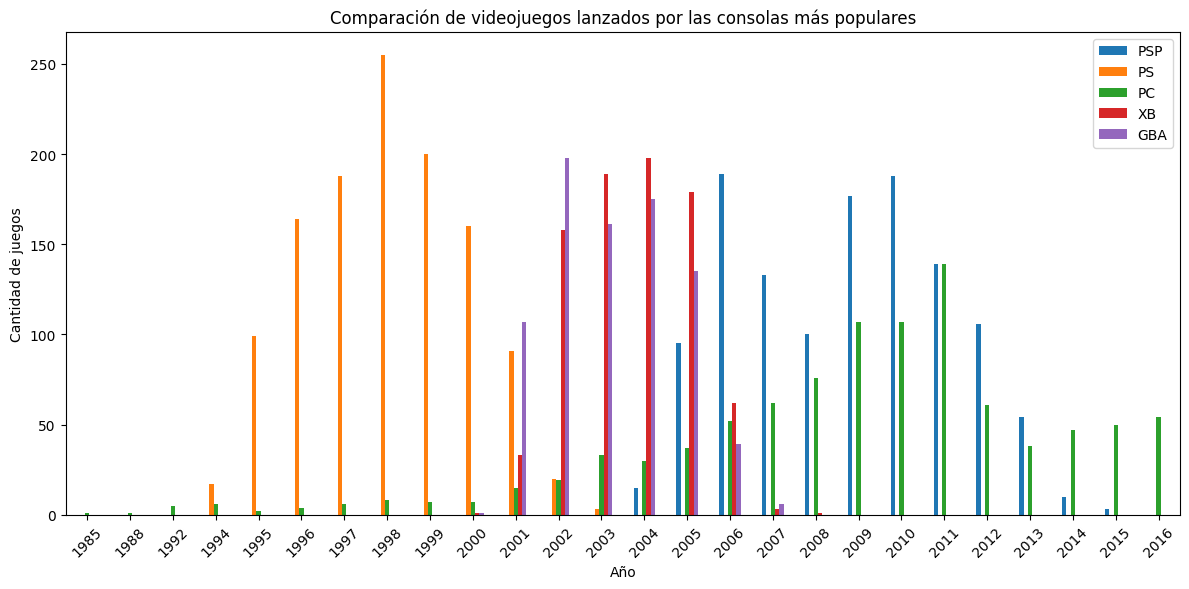

In [44]:
consolas_por_año_2 = pd.DataFrame({'PSP': PSP_año, 
                                   'PS': PS_año, 
                                   'PC': PC_año, 
                                   'XB': XB_año, 
                                   'GBA': GBA_año 
                                  }).fillna(0)

consolas_por_año_2.plot(kind='bar', 
                        figsize=(12, 6), 
                        title='Comparación de videojuegos lanzados por las consolas más populares', 
                        xlabel='Año', 
                        ylabel='Cantidad de juegos', 
                        rot=45 
                       )
plt.legend()
plt.tight_layout()
plt.show()

In [45]:
vida_util_consola = (df_games.groupby('platform')['year_of_release'].max())-(df_games.groupby('platform')['year_of_release'].min())
vida_util_consola = vida_util_consola.sort_values(ascending=False)
vida_util_consola

platform
PC      31
DS      28
GB      13
X360    11
PSP     11
PS2     11
NES     11
DC      10
Wii     10
PS3     10
2600     9
SNES     9
PS       9
XB       8
GBA      7
GC       6
N64      6
3DS      5
PSV      5
SAT      5
WiiU     4
GEN      4
NG       3
XOne     3
PS4      3
WS       2
3DO      1
SCD      1
TG16     0
PCFX     0
GG       0
Name: year_of_release, dtype: int64

In [46]:
DS.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,2151.000000,2151.000000,2151.000000,2151.000000,2151.000000,2151.000000,2151.000000,2151.000000
mean,2008.182706,0.177778,0.087815,0.081623,0.027550,67.754068,7.338773,0.374765
std,1.766246,0.533684,0.493852,0.392268,0.127893,8.572940,0.780812,1.426451
min,1985.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.010000
25%,2007.000000,0.000000,0.000000,0.000000,0.000000,66.000000,7.100000,0.050000
50%,2008.000000,0.060000,0.000000,0.000000,0.010000,69.000000,7.500000,0.110000
75%,2009.000000,0.170000,0.020000,0.030000,0.020000,70.000000,7.600000,0.270000
max,2013.000000,11.280000,10.950000,6.500000,2.880000,93.000000,9.500000,29.800000


In [47]:
print(DS[DS['year_of_release'] == 1985])

                                      name platform  year_of_release   genre  \
15957  Strongest Tokyo University Shogi DS       DS             1985  Action   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
15957       0.0       0.0      0.02          0.0          68.0         7.4   

      rating  total_sales  
15957     RP         0.02  


Al analizar los videojuegos por consola, vemos que para la consola DS hay un valor extraño porque está calculado una vida útil de 28 años, lo cual no tiene nada de lógica. Se identifica que el juego en el index 15957 tiene la fecha de lanzamiento errada (1985). Revisando en internet, la fecha de lanzamiento del juego fue 2007. Hay que actualizar este valor.

In [48]:
df_games.at[15957, 'year_of_release'] = 2007

vida_util_consola = (df_games.groupby('platform')['year_of_release'].max())-(df_games.groupby('platform')['year_of_release'].min())
vida_util_consola = vida_util_consola.sort_values(ascending=False)
vida_util_consola

platform
PC      31
GB      13
NES     11
X360    11
PSP     11
PS2     11
DC      10
Wii     10
PS3     10
2600     9
SNES     9
PS       9
DS       9
XB       8
GBA      7
GC       6
N64      6
SAT      5
3DS      5
PSV      5
WiiU     4
GEN      4
NG       3
PS4      3
XOne     3
WS       2
SCD      1
3DO      1
TG16     0
GG       0
PCFX     0
Name: year_of_release, dtype: int64

In [49]:
print(vida_util_consola.iloc[1:9].mean())

10.875


La vida útil en promedio de las consolas es de 10.87 años. Vamos a revisar en cuánto tiempo aparecen las nuevas consolas.

In [50]:
consola_nueva = df_games.groupby('platform')['year_of_release'].min().sort_values(ascending=False)
consola_nueva

platform
XOne    2013
PS4     2013
WiiU    2012
3DS     2011
PSV     2011
PS3     2006
Wii     2006
X360    2005
PSP     2004
DS      2004
GC      2001
GBA     2000
XB      2000
PS2     2000
WS      1999
DC      1998
PCFX    1996
N64     1996
TG16    1995
SAT     1994
PS      1994
3DO     1994
SCD     1993
NG      1993
GG      1992
SNES    1990
GEN     1990
GB      1988
PC      1985
NES     1983
2600    1980
Name: year_of_release, dtype: int64

In [51]:
microsoft = ((consola_nueva['XOne'] - consola_nueva['X360']) + (consola_nueva['X360'] - consola_nueva['XB'])) / 2
nintendo = ((consola_nueva['WiiU'] - consola_nueva['Wii']) + (consola_nueva['Wii'] - consola_nueva['GC']) + (consola_nueva['GC'] - consola_nueva['N64'])) / 3
nintendo_port = ((consola_nueva['3DS'] - consola_nueva['DS']) + (consola_nueva['DS'] - consola_nueva['GBA'])) / 2
sony = ((consola_nueva['PS4'] - consola_nueva['PS3']) + (consola_nueva['PS3'] - consola_nueva['PS2']) + (consola_nueva['PS2'] - consola_nueva['PS'])) / 3
sony_port = (consola_nueva['PSV'] - consola_nueva['PSP'])

cons_prom = (microsoft + nintendo + sony) / 3
port_prom = (nintendo_port + sony_port) / 2


print(f'Microsoft lanza una nueva consola cada {microsoft:.1f} años en promedio.')         
print(f'Nintendo lanza una nueva consola cada {nintendo:.1f} años en promedio.')  
print(f'Nintendo lanza una nueva consola portátil cada {nintendo_port:.1f} años en promedio.')
print(f'Sony lanza una nueva consola cada {sony:.1f} años en promedio.')
print(f'Sony ha lanzado dos consolas portátiles y hay {sony_port} años de diferencia entre ellas.')
print()
print(f'En promedio, aparece una nueva consola cada {cons_prom:.1f} años')
print(f'En promedio, aparece una nueva consola portátil cada {port_prom:.1f} años')

Microsoft lanza una nueva consola cada 6.5 años en promedio.
Nintendo lanza una nueva consola cada 5.3 años en promedio.
Nintendo lanza una nueva consola portátil cada 5.5 años en promedio.
Sony lanza una nueva consola cada 6.3 años en promedio.
Sony ha lanzado dos consolas portátiles y hay 7 años de diferencia entre ellas.

En promedio, aparece una nueva consola cada 6.1 años
En promedio, aparece una nueva consola portátil cada 6.2 años


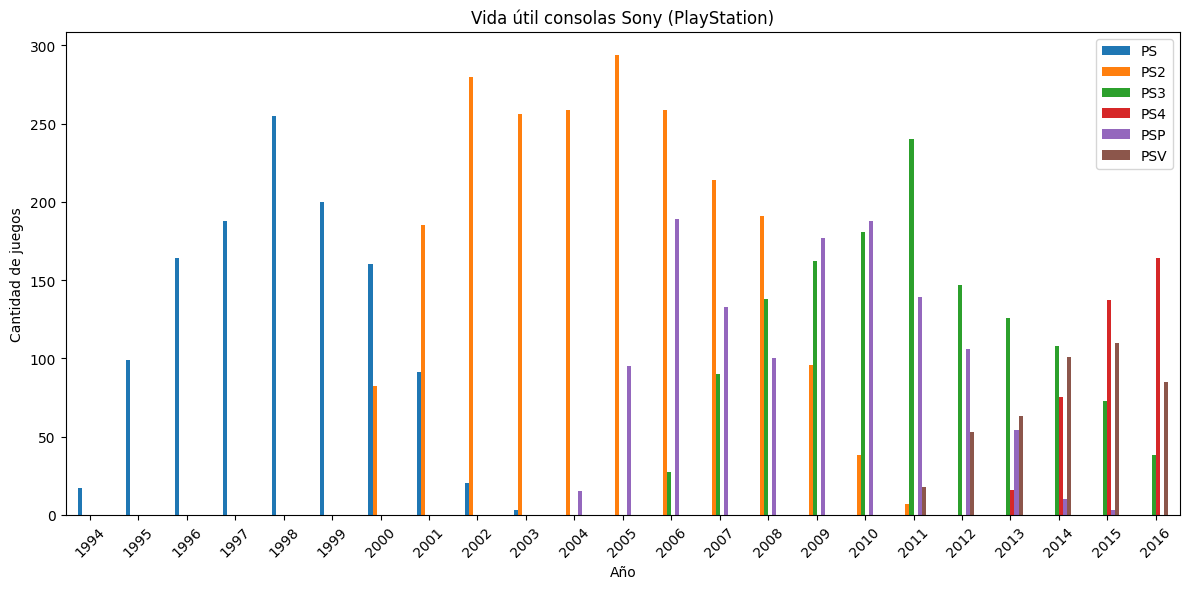

In [52]:
XOne = df_games[df_games['platform'] == 'XOne']
XOne_año = XOne.groupby('year_of_release')['genre'].count()

PS4 = df_games[df_games['platform'] == 'PS4']
PS4_año = PS4.groupby('year_of_release')['genre'].count()

WiiU = df_games[df_games['platform'] == 'WiiU']
WiiU_año = WiiU.groupby('year_of_release')['genre'].count()

_3DS = df_games[df_games['platform'] == '3DS']
_3DS_año = _3DS.groupby('year_of_release')['genre'].count()

PSV = df_games[df_games['platform'] == 'PSV']
PSV_año = PSV.groupby('year_of_release')['genre'].count()

N64 = df_games[df_games['platform'] == 'N64']
N64_año = N64.groupby('year_of_release')['genre'].count()

GC = df_games[df_games['platform'] == 'GC']
GC_año = GC.groupby('year_of_release')['genre'].count()

sony_por_año = pd.DataFrame({'PS': PS_año, 
                             'PS2': PS2_año, 
                             'PS3': PS3_año, 
                             'PS4': PS4_año, 
                             'PSP': PSP_año, 
                             'PSV': PSV_año 
                            }).fillna(0)

sony_por_año.plot(kind='bar',
                      figsize=(12, 6),
                      title='Vida útil consolas Sony (PlayStation)',
                      xlabel='Año',
                      ylabel='Cantidad de juegos',
                      rot=45
                     )
plt.legend()
plt.tight_layout()
plt.show()

De acuerdo a los datos, vemos que la PS3 ya está cerrando su ciclo de vida mientras que la PS4 está llegando al pico de su vida útil. Por lo tanto, la PS4 se perfila como una de las consolas más relevantes para el 2017 por el lado de Sony. También es relevante mencional que la consola portátil PSV está en la mitad de su vida útil y tendrá una participación importante en el próximo año (2017) Es posible que para 2018 PlayStation lance una nueva consola portátil.

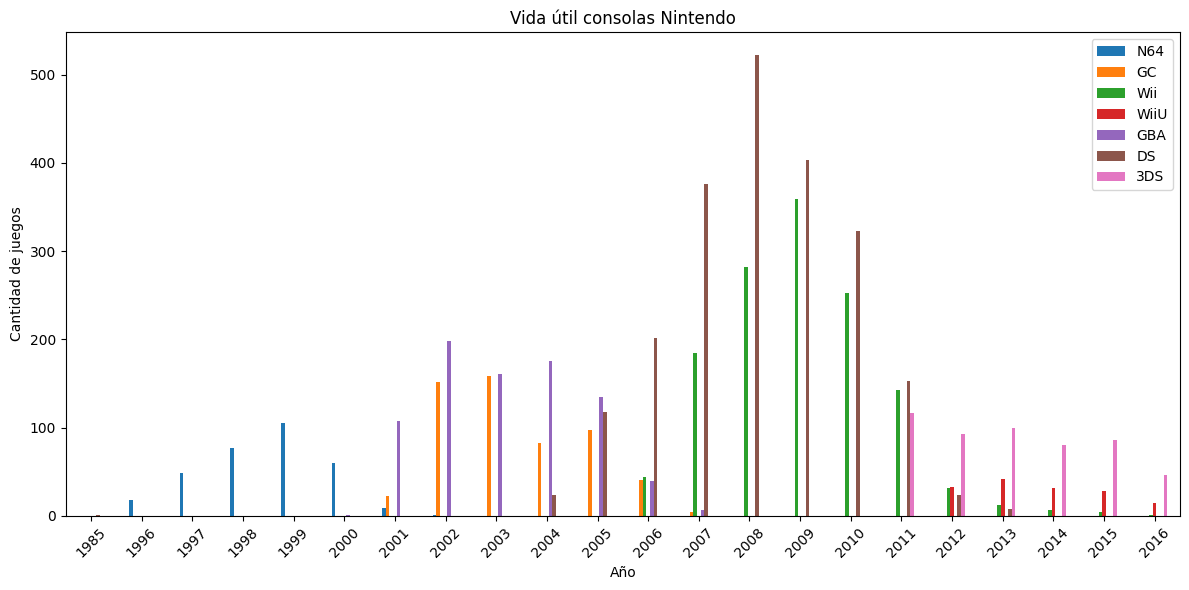

In [53]:
nintendo_por_año = pd.DataFrame({'N64': N64_año, 
                             'GC': GC_año, 
                             'Wii': Wii_año, 
                             'WiiU': WiiU_año, 
                             'GBA': GBA_año, 
                             'DS': DS_año,
                             '3DS':_3DS_año,    
                            }).fillna(0)

nintendo_por_año.plot(kind='bar',
                      figsize=(12, 6),
                      title='Vida útil consolas Nintendo',
                      xlabel='Año',
                      ylabel='Cantidad de juegos',
                      rot=45
                     )
plt.legend()
plt.tight_layout()
plt.show()

De acuerdo a los datos, vemos que la consola Wii ya cerró su ciclo de vida mientras que la WiiU está todavía dentro de su período de vida útil. Sin embargo, esta consola ya está cerrando su ciclo y es posible que Nintendo lance una nueva consola el siguiente año (2017). Se recomienda ser conservadores con esta consola. 

Algo muy similar pasa con la consola portátil 3DS la cuál vemos que ya está cerrando su ciclo de vida de acuerdo a los datos históricos de Nintendo. No se perfila como una consola fuerte para el 2017. Lo más probable es que venga una consola nueva por el lado de Nintendo.

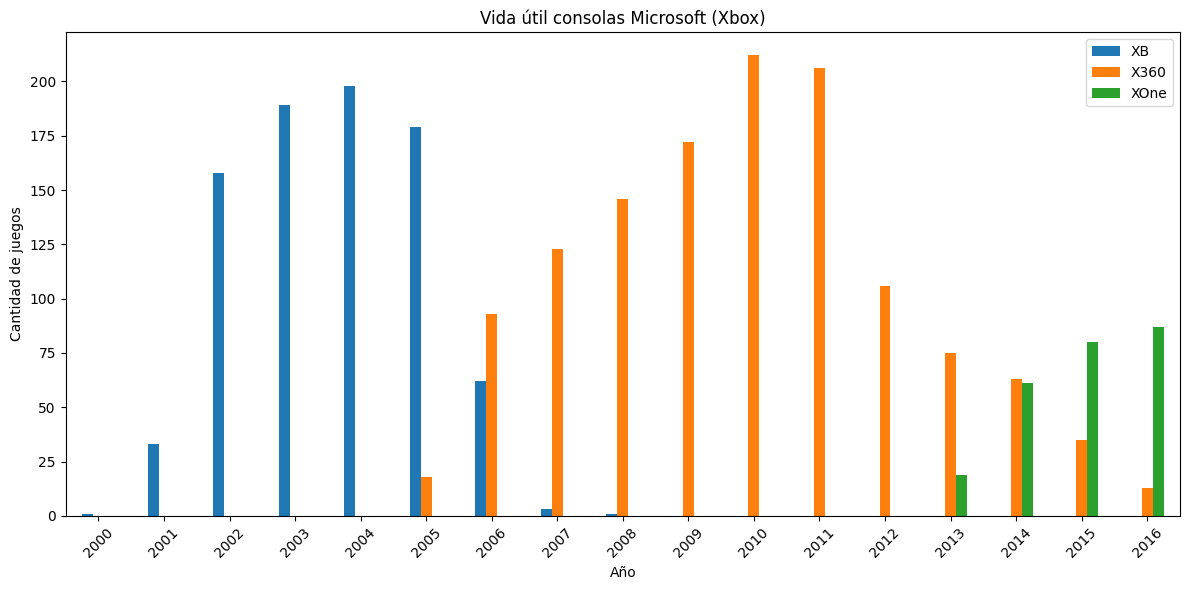

In [54]:
microsoft_por_año = pd.DataFrame({'XB': XB_año, 
                                  'X360': X360_año, 
                                  'XOne': XOne_año, 
                                 }).fillna(0)

microsoft_por_año.plot(kind='bar',
                      figsize=(12, 6),
                      title='Vida útil consolas Microsoft (Xbox)',
                      xlabel='Año',
                      ylabel='Cantidad de juegos',
                      rot=45
                     )
plt.legend()
plt.tight_layout()
plt.show()

Para el caso de Microsoft, los datos muestran que la Xbox 360 ya cumplió su vida útil mientras que la XboxOne está comenzando. Esta consola será una de las más importantes en 2017 y, de acuerdo a lo visto en las anteriores compañías, es muy probable que Microsoft potencialice fuertemente esta consola para aprovechar el mercado.

En este gráfico no se ve una diferencia clara entra las plataformas, así que vamos a analizar las ventas para las plataformas principales de acuerdo a su vida útil.

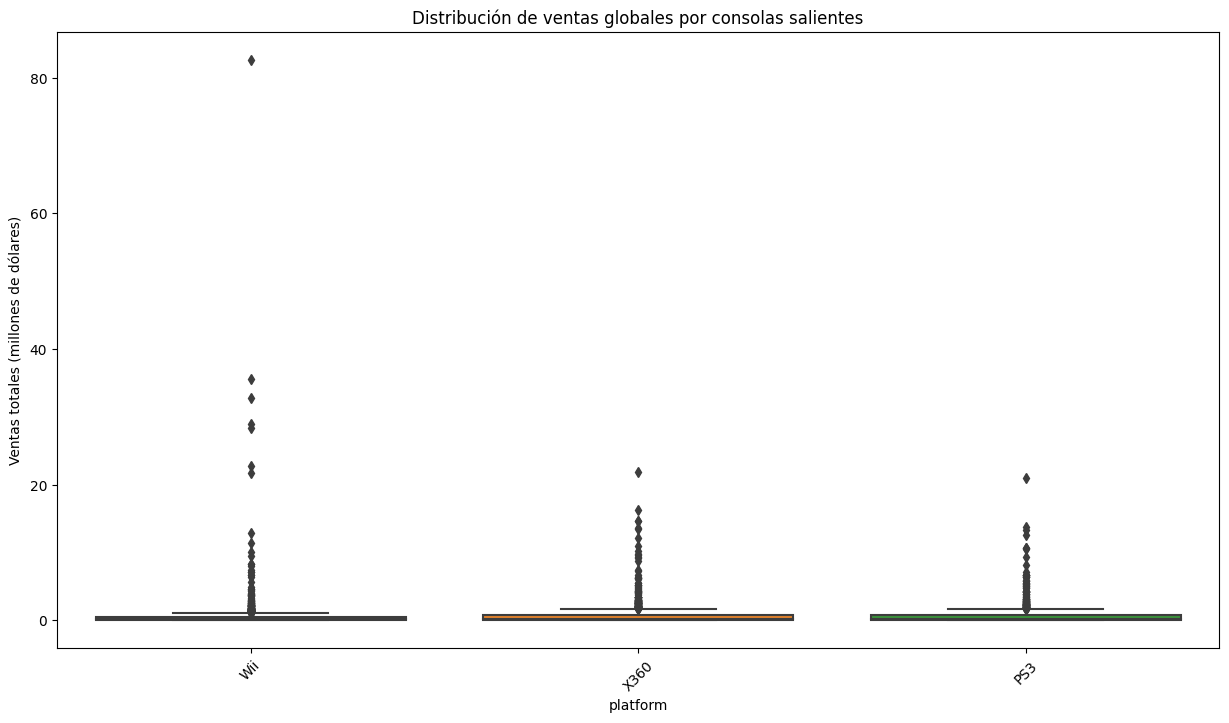

In [55]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_games[(df_games['platform'] == 'X360') | (df_games['platform'] == 'Wii') | (df_games['platform'] == 'PS3')], x='platform', y='total_sales')
plt.title('Distribución de ventas globales por consolas salientes')
plt.ylabel('Ventas totales (millones de dólares)')
plt.xticks(rotation=45)
plt.show()

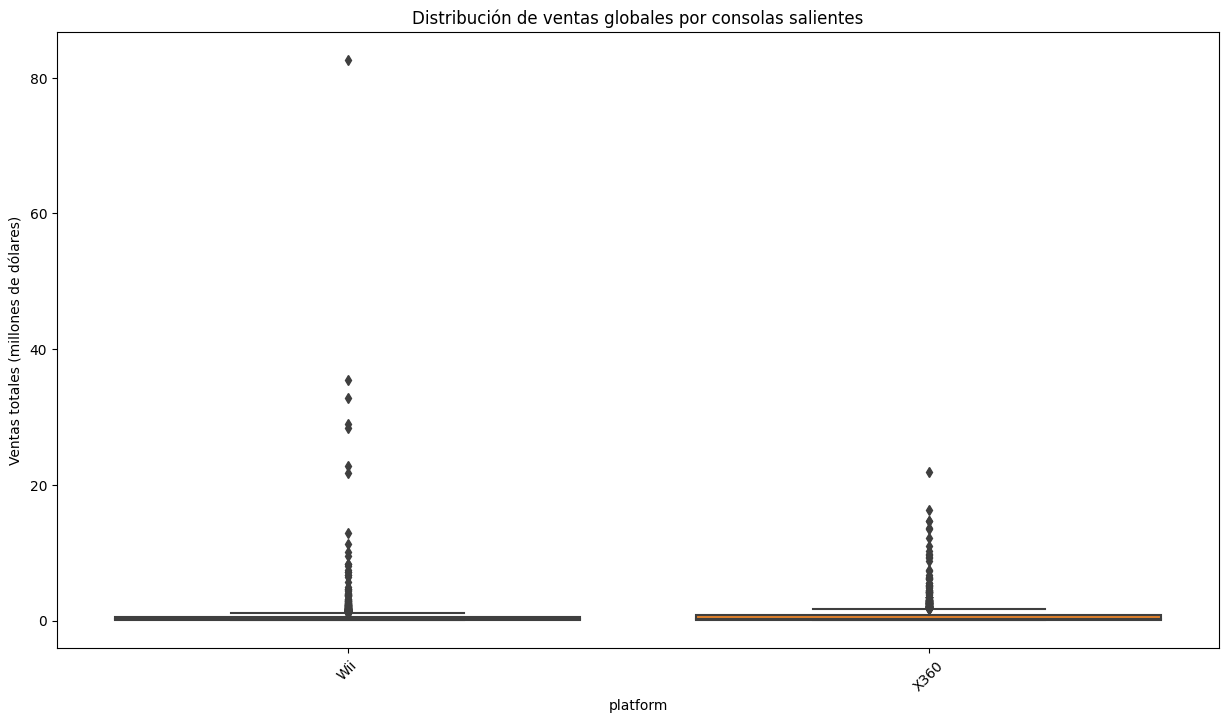

In [56]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_games[(df_games['platform'] == 'X360') | (df_games['platform'] == 'Wii')], x='platform', y='total_sales')
plt.title('Distribución de ventas globales por consolas salientes')
plt.ylabel('Ventas totales (millones de dólares)')
plt.xticks(rotation=45)
plt.show()

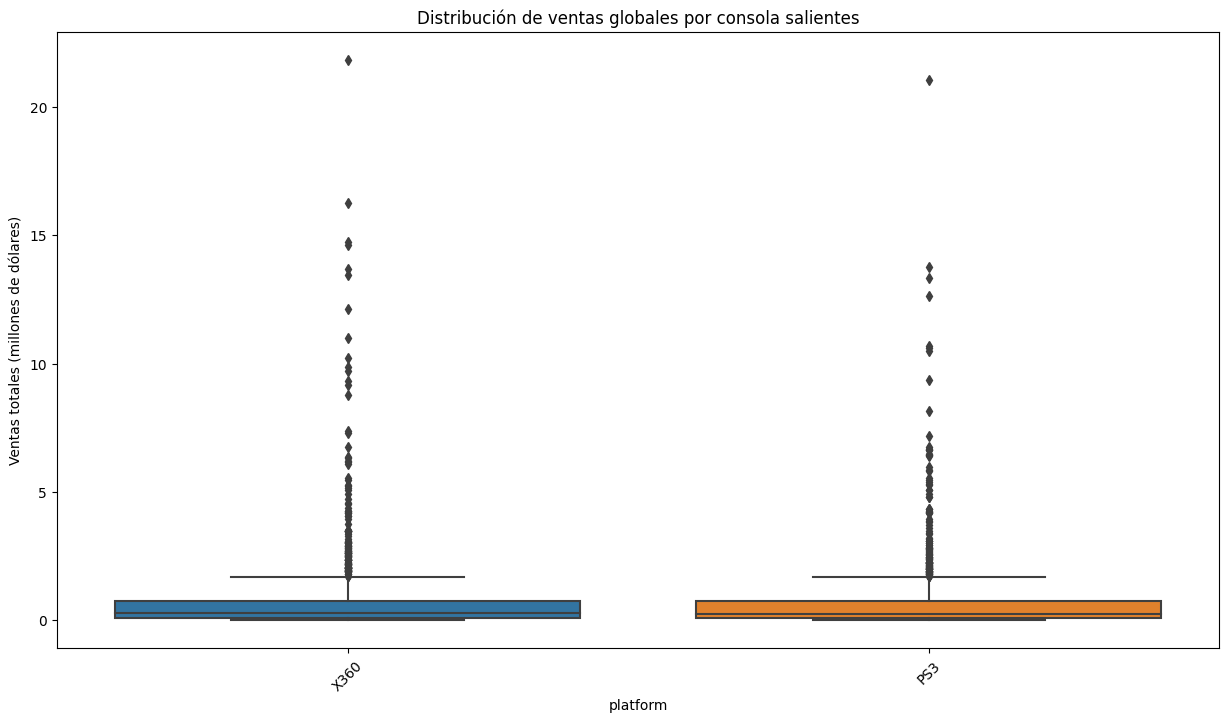

In [57]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_games[(df_games['platform'] == 'X360') | (df_games['platform'] == 'PS3')], x='platform', y='total_sales')
plt.title('Distribución de ventas globales por consola salientes')
plt.ylabel('Ventas totales (millones de dólares)')
plt.xticks(rotation=45)
plt.show()

En el primer análisis, vemos que la consola Wii tiene unos valores de ventas atípicos, pero en general las ventas entre las 3 compañías principales son muy similares respecto a sus consolas vigentes. En la segunda gráfica donde se compara Sony y Microsoft se ve mucho más claro.

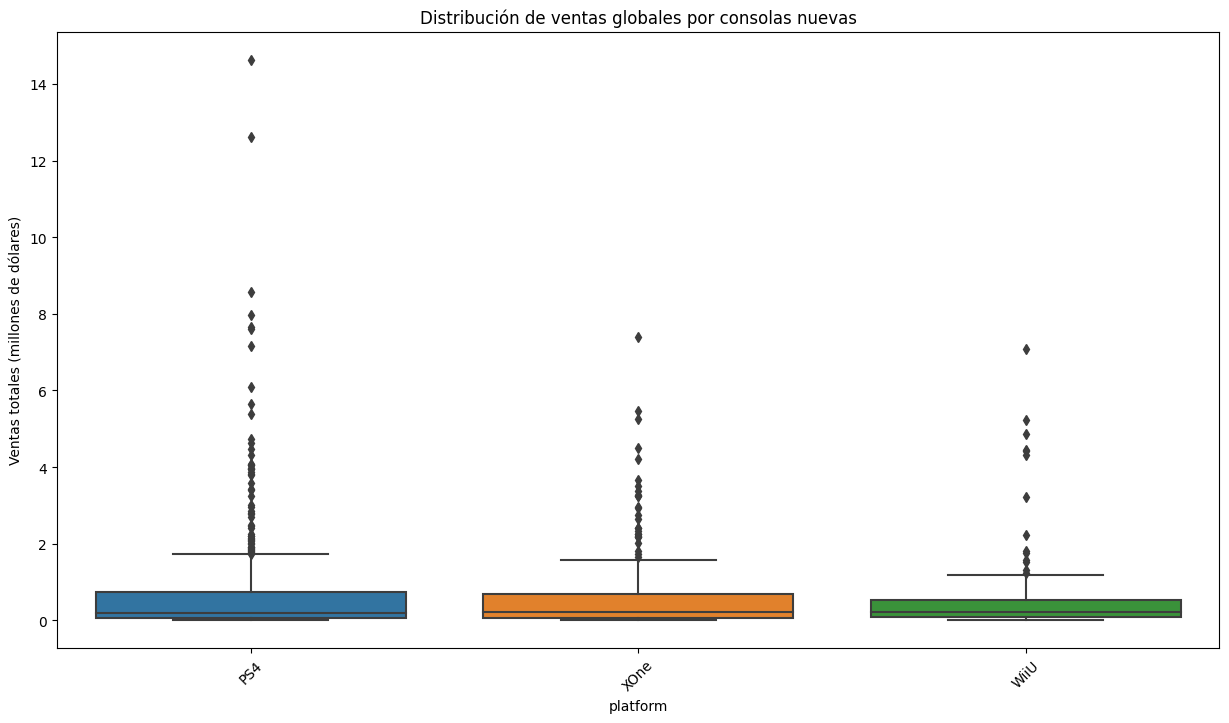

In [58]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_games[(df_games['platform'] == 'XOne') | (df_games['platform'] == 'WiiU') | (df_games['platform'] == 'PS4')], x='platform', y='total_sales')
plt.title('Distribución de ventas globales por consolas nuevas')
plt.ylabel('Ventas totales (millones de dólares)')
plt.xticks(rotation=45)
plt.show()

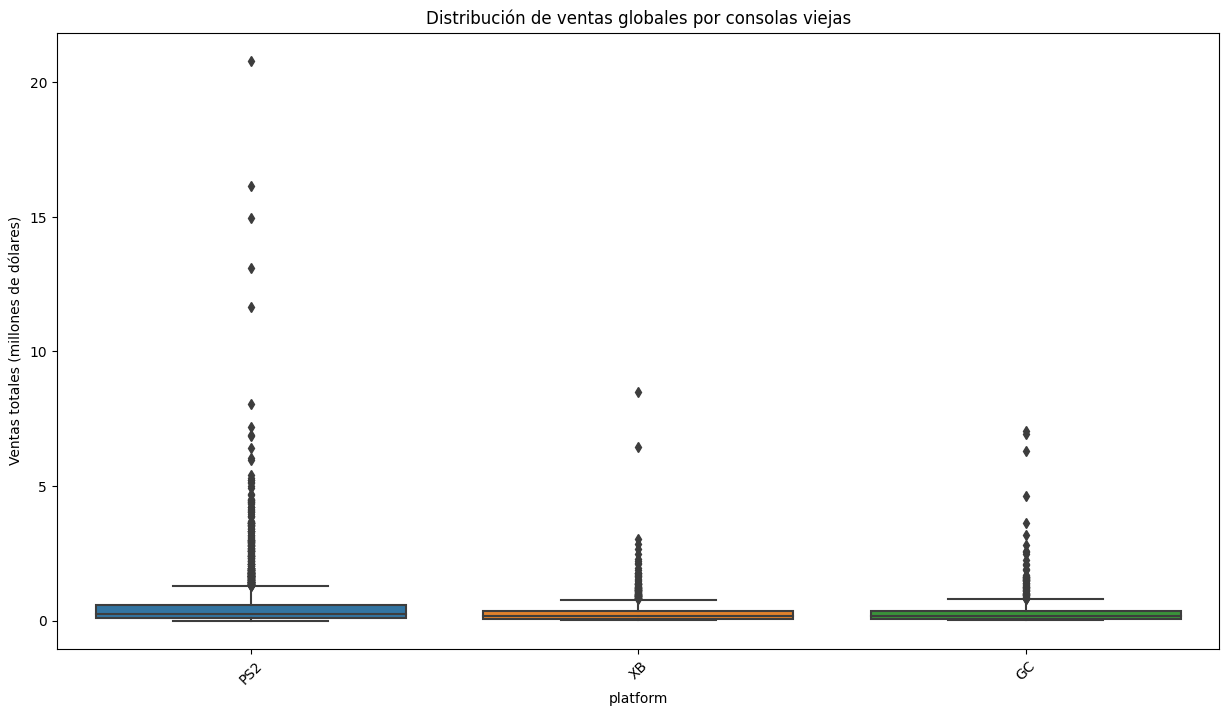

In [59]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_games[(df_games['platform'] == 'XB') | (df_games['platform'] == 'GC') | (df_games['platform'] == 'PS2')], x='platform', y='total_sales')
plt.title('Distribución de ventas globales por consolas viejas')
plt.ylabel('Ventas totales (millones de dólares)')
plt.xticks(rotation=45)
plt.show()

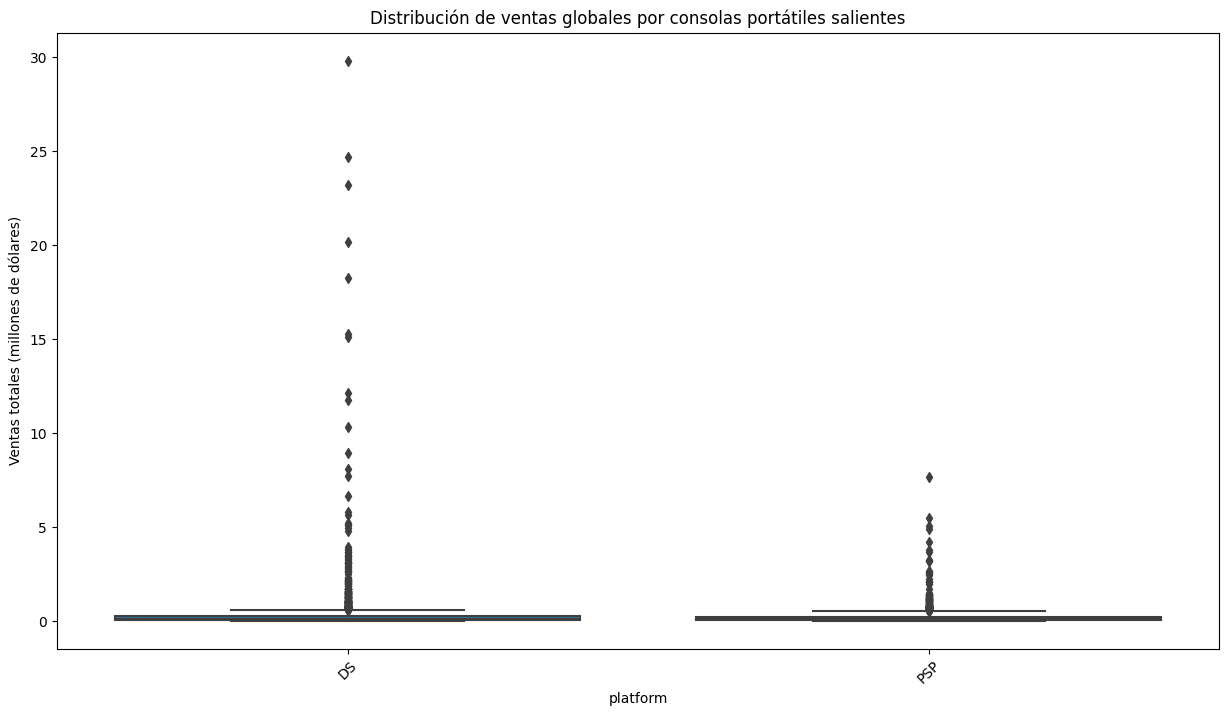

In [60]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_games[(df_games['platform'] == 'DS') | (df_games['platform'] == 'PSP')], x='platform', y='total_sales')
plt.title('Distribución de ventas globales por consolas portátiles salientes')
plt.ylabel('Ventas totales (millones de dólares)')
plt.xticks(rotation=45)
plt.show()

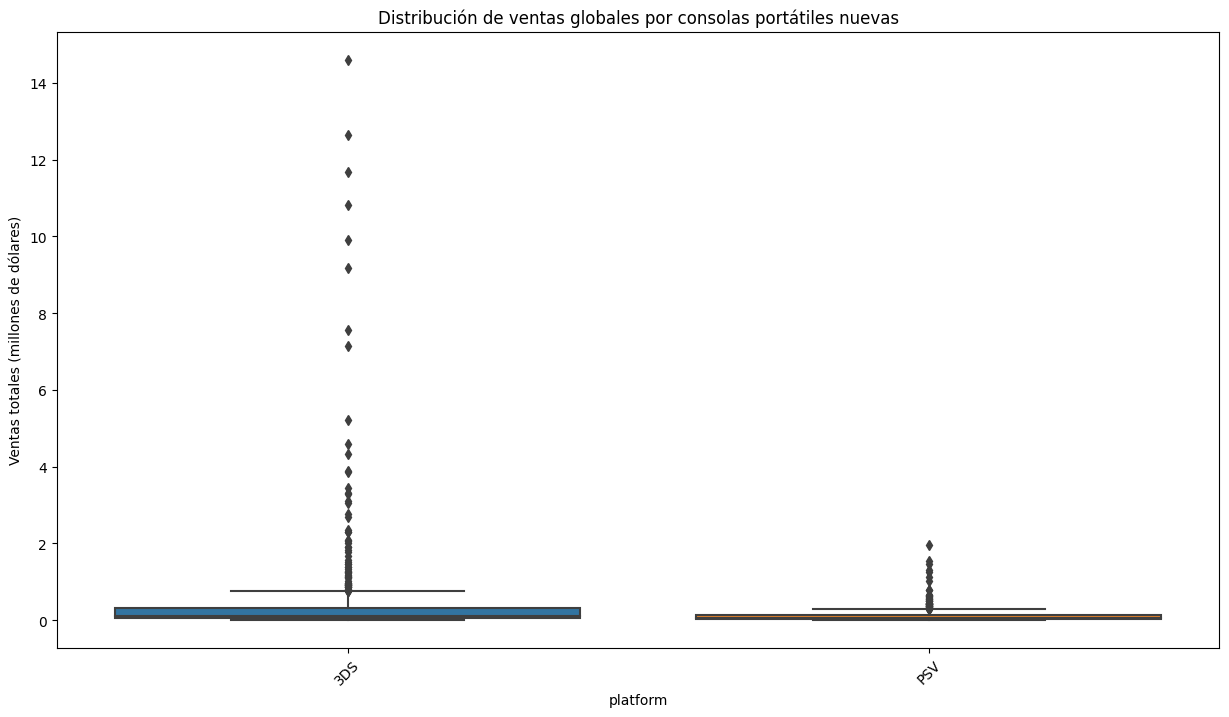

In [61]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_games[(df_games['platform'] == '3DS') | (df_games['platform'] == 'PSV')], x='platform', y='total_sales')
plt.title('Distribución de ventas globales por consolas portátiles nuevas')
plt.ylabel('Ventas totales (millones de dólares)')
plt.xticks(rotation=45)
plt.show()

El análisis de ventas por plataforma nos permite ver que la tendencia de mercado está más concentrado en Microsoft y Sony con sus respectivas consolas. Sin embargo, en Sony (PlayStation) vemos unos valores de ventas atípicos que podrían ser los juegos exclusivos de estas consolas y que generan unas ventas importantes. La tendencia muestra que para el siguiente año podría mantenerse la misma distribución, donde la mayoría de ventas estarán concentradas en las consolas XOne y PS4, pero también se tendrá una participación importante de Sony con su consola WiiU.

Por el lado de las consolas portátiles, vemos que Nintendo tiene una mayor participación de ventas y tiene muchos títulos exclusivos que generan valores atípicos con unas ventas muy altas significativas. Es muy probable que Nintendo fortalezca su mercado de videojuegos para la consola portátil 3DS, o incluso que haya una nueva consola de este tipo.

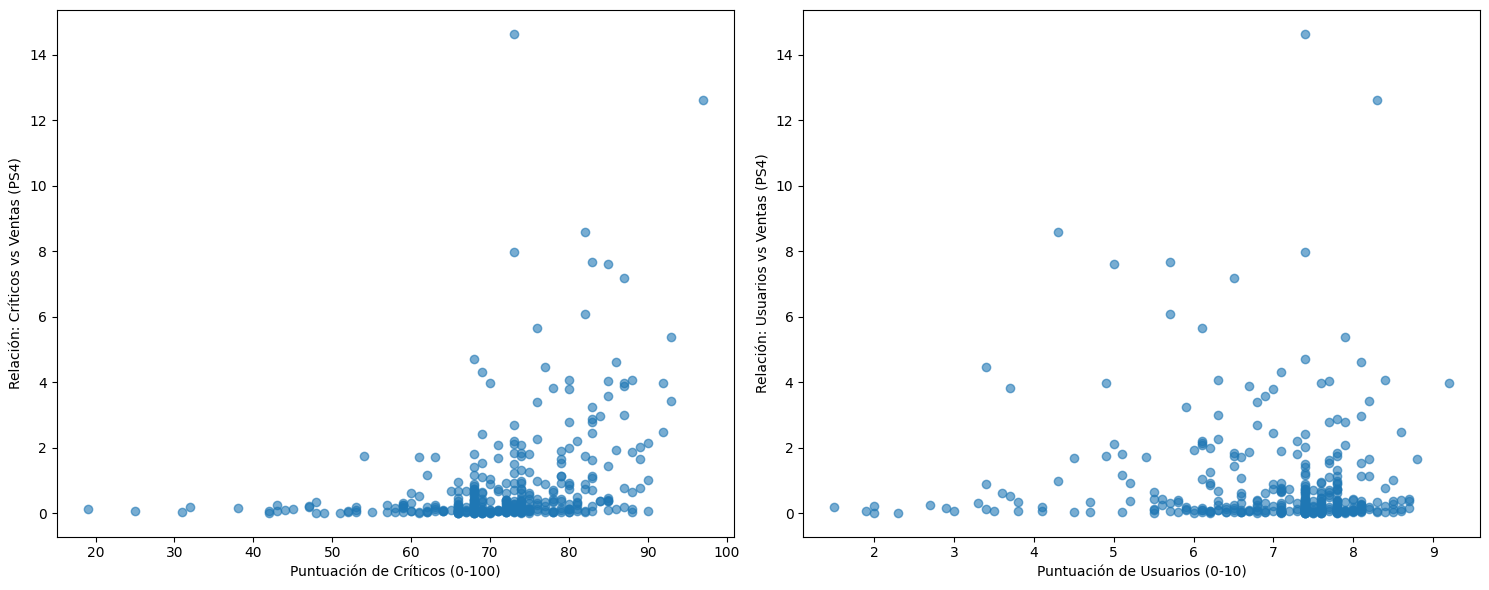

In [62]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.scatter(PS4['critic_score'], PS4['total_sales'], alpha=0.6)
plt.xlabel('Puntuación de Críticos (0-100)')
plt.ylabel('Relación: Críticos vs Ventas (PS4)')

plt.subplot(1, 2, 2)
plt.scatter(PS4['user_score'], PS4['total_sales'], alpha=0.6)
plt.xlabel('Puntuación de Usuarios (0-10)')
plt.ylabel('Relación: Usuarios vs Ventas (PS4)')

plt.tight_layout()
plt.show()

In [63]:
corr_critic = PS4['critic_score'].corr(PS4['total_sales'])
corr_user = PS4['user_score'].corr(PS4['total_sales'])

print(f"Correlación Críticos-Ventas: {corr_critic:.3f}")
print(f"Correlación Usuarios-Ventas: {corr_user:.3f}")

Correlación Críticos-Ventas: 0.351
Correlación Usuarios-Ventas: -0.065


De acuerdo a estos resultados, hay una correlación moderada entre las calificaciones de los críticos y las ventas. Las calificaciones de los usuarios tienen una correlación prácticamente nula con respecto a las ventas. Esto podría indicar que las calificaciones de los críticos profesionales podrían predecir el funcionamiento del mercado de una forma moderada.

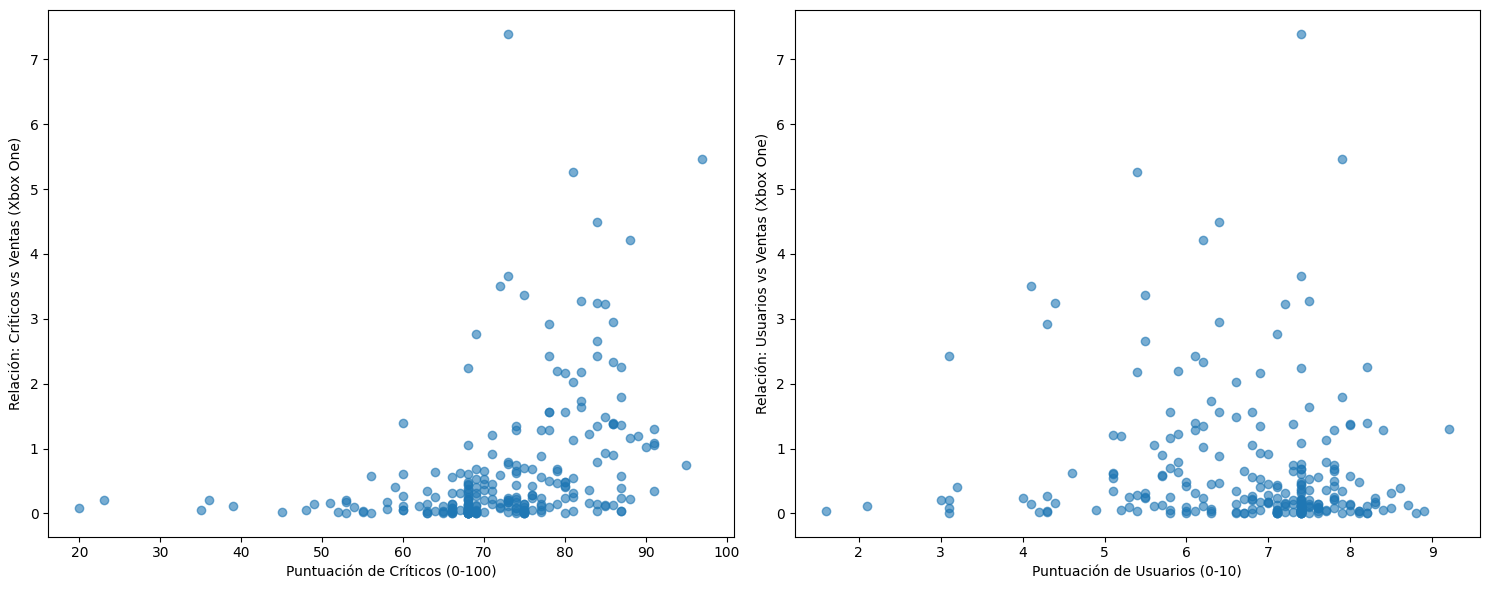

Correlación Críticos-Ventas: 0.379
Correlación Usuarios-Ventas: -0.105


In [64]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.scatter(XOne['critic_score'], XOne['total_sales'], alpha=0.6)
plt.xlabel('Puntuación de Críticos (0-100)')
plt.ylabel('Relación: Críticos vs Ventas (Xbox One)')

plt.subplot(1, 2, 2)
plt.scatter(XOne['user_score'], XOne['total_sales'], alpha=0.6)
plt.xlabel('Puntuación de Usuarios (0-10)')
plt.ylabel('Relación: Usuarios vs Ventas (Xbox One)')

plt.tight_layout()
plt.show()

corr_critic = XOne['critic_score'].corr(XOne['total_sales'])
corr_user = XOne['user_score'].corr(XOne['total_sales'])

print(f"Correlación Críticos-Ventas: {corr_critic:.3f}")
print(f"Correlación Usuarios-Ventas: {corr_user:.3f}")

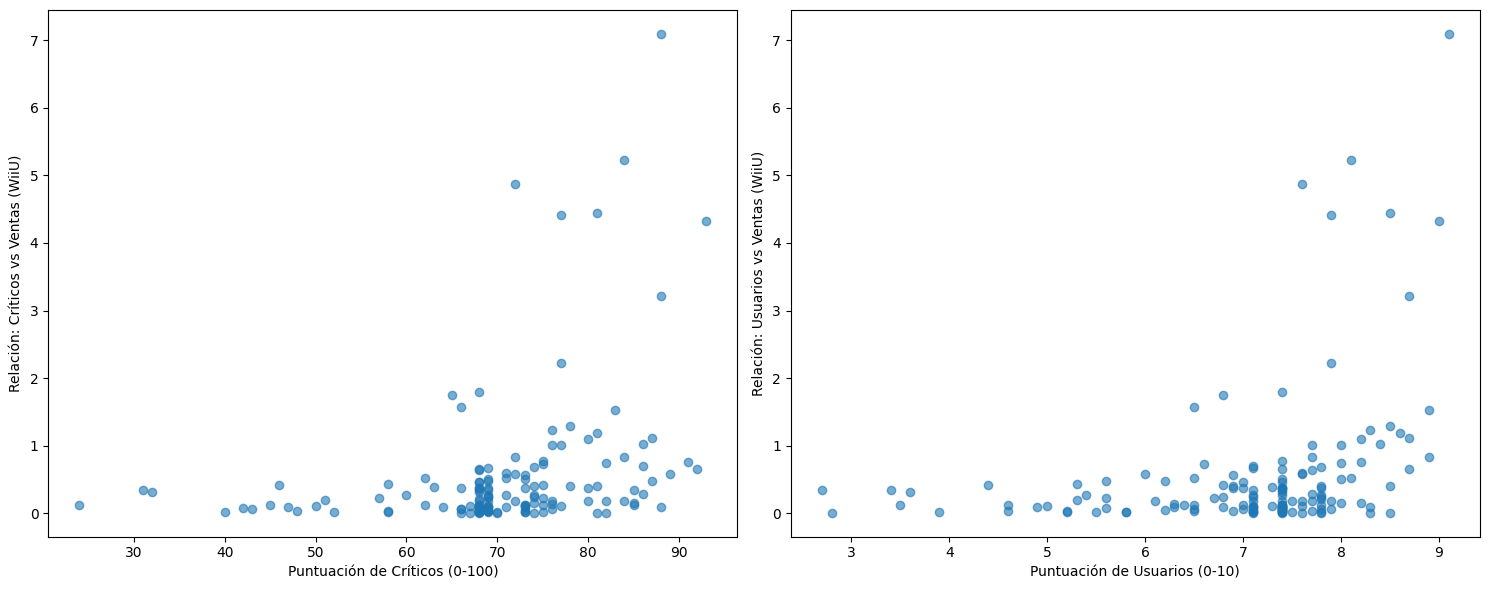

Correlación Críticos-Ventas: 0.324
Correlación Usuarios-Ventas: 0.328


In [65]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.scatter(WiiU['critic_score'], WiiU['total_sales'], alpha=0.6)
plt.xlabel('Puntuación de Críticos (0-100)')
plt.ylabel('Relación: Críticos vs Ventas (WiiU)')

plt.subplot(1, 2, 2)
plt.scatter(WiiU['user_score'], WiiU['total_sales'], alpha=0.6)
plt.xlabel('Puntuación de Usuarios (0-10)')
plt.ylabel('Relación: Usuarios vs Ventas (WiiU)')

plt.tight_layout()
plt.show()

corr_critic = WiiU['critic_score'].corr(WiiU['total_sales'])
corr_user = WiiU['user_score'].corr(WiiU['total_sales'])

print(f"Correlación Críticos-Ventas: {corr_critic:.3f}")
print(f"Correlación Usuarios-Ventas: {corr_user:.3f}")

Revisando la correlación entre las calificaciones de críticos y usarios con las ventas en las otras consolas nuevas más relevantes, vemos que para el caso de Microsoft (Xbox One) el resultado es muy similar al de PlayStation 4: Hay una relación modera entre las ventas y las calificaciones de críticos, y prácticamente no hay relación entre las ventas y las calificaciones de usuarios.

Sin embargo, para el caso de Nintendo con su consola WiiU, vemos que se tiene una relación moderada entre las ventas, las calificaciones de los críticos y las calificaciones de los usuarios. Esto podría deberse a que, usualmente, los juegos de Nintendo están pensandos más para la familia y los niños, y los compradores van a ser más estrictos con lo que compran. Para Xbox y PS se tienen videojuegos para todo nicho.

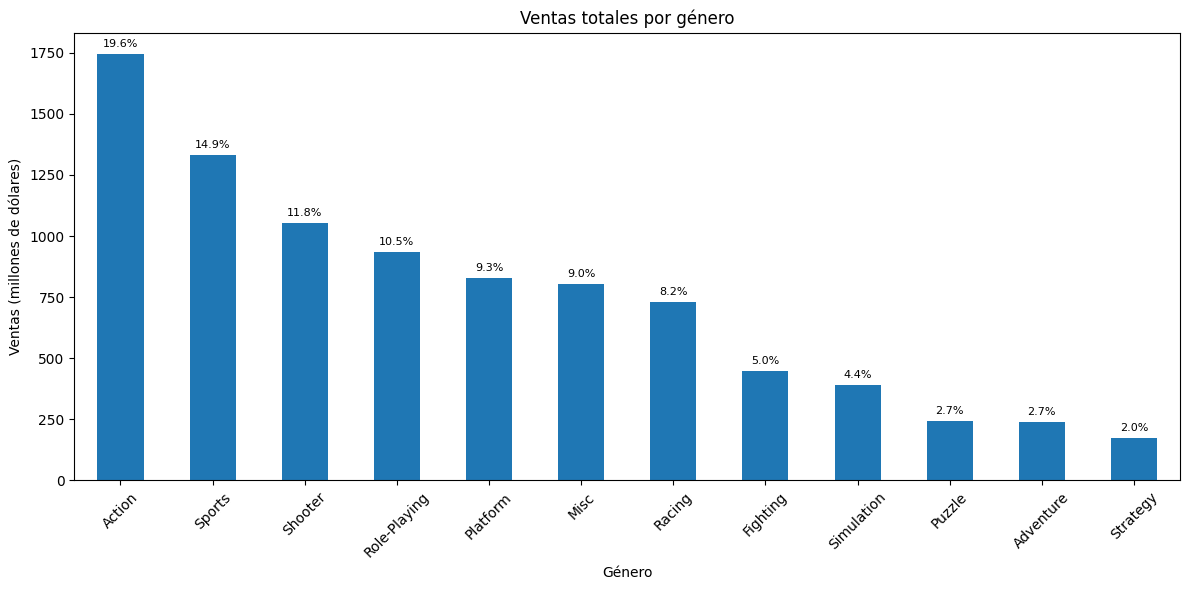

In [66]:
ventas_genero = df_games.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
total_genero = ventas_genero.sum()
porcentajes3 = (ventas_genero / total_genero) * 100
ax3 = ventas_genero.plot(kind='bar', title='Ventas totales por género', 
                         xlabel='Género', 
                         ylabel='Ventas (millones de dólares)', 
                         figsize=(12, 6) 
                        )

for i, (valor, porcentaje) in enumerate(zip(ventas_genero, porcentajes3)):
    ax3.text(i, valor+20, f'{porcentaje:.1f}%', 
             ha='center', 
             va='bottom', 
             fontsize=8 
            )

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

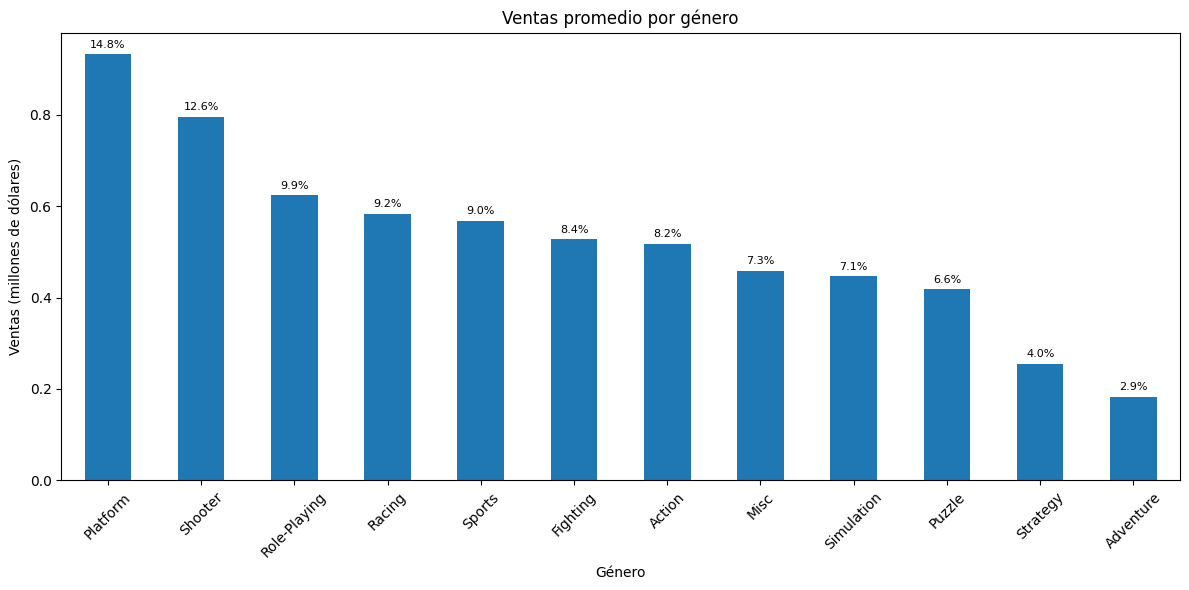

In [67]:
ventas_prom_genero = df_games.groupby('genre')['total_sales'].mean().sort_values(ascending=False)
tot_genero = ventas_prom_genero.sum()
porcentajes7 = (ventas_prom_genero / tot_genero) * 100
ax7 = ventas_prom_genero.plot(kind='bar', title='Ventas promedio por género', 
                         xlabel='Género', 
                         ylabel='Ventas (millones de dólares)', 
                         figsize=(12, 6) 
                        )

for i, (valor, porcentaje) in enumerate(zip(ventas_prom_genero, porcentajes7)):
    ax7.text(i, valor + 0.01, f'{porcentaje:.1f}%', 
             ha='center', 
             va='bottom', 
             fontsize=8 
            )

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Si analizamos las ventas de videojuegos por género, vemos que el 56% de las ventas está agrupado en 4 géneros principales: Acción, deportes, disparo y juegos de rol.

Si revisamos el promedio de ventas por género, los más relevantes son: Plataforma, disparo, juegos de rol y carreras.

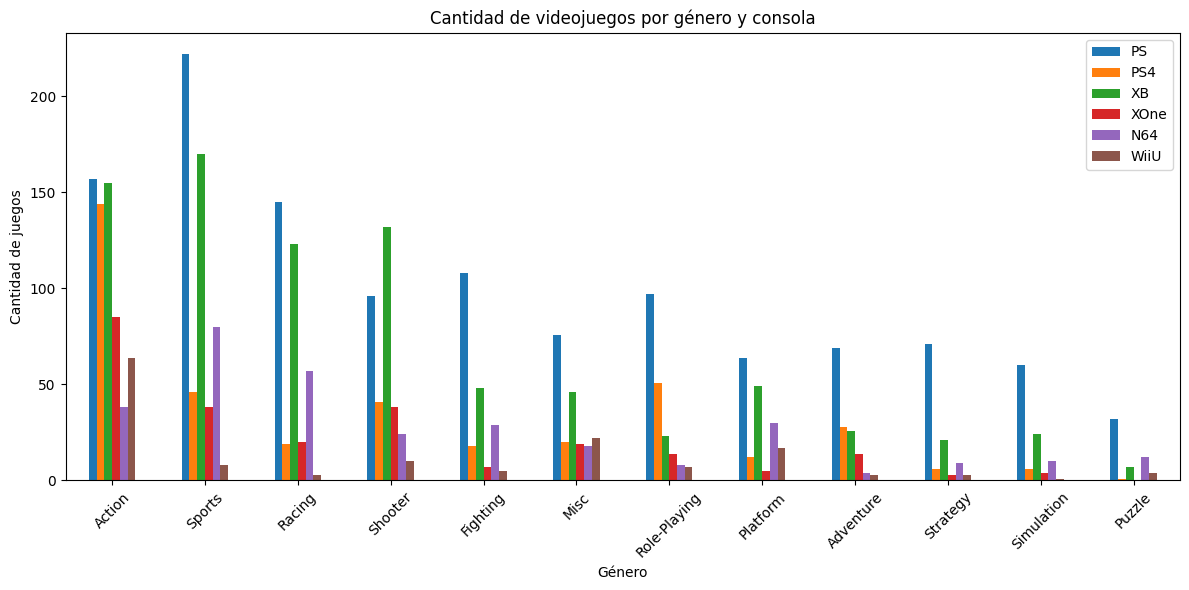

In [68]:
genero_PS4 = PS4.groupby('genre')['total_sales'].count().sort_values(ascending=False)
genero_PS = PS.groupby('genre')['total_sales'].count().sort_values(ascending=False)
genero_XB = XB.groupby('genre')['total_sales'].count().sort_values(ascending=False)
genero_XOne = XOne.groupby('genre')['total_sales'].count().sort_values(ascending=False)
genero_N64 = N64.groupby('genre')['total_sales'].count().sort_values(ascending=False)
genero_WiiU = WiiU.groupby('genre')['total_sales'].count().sort_values(ascending=False)

cant_juegos_genero = pd.DataFrame({'PS': genero_PS, 
                                   'PS4': genero_PS4, 
                                   'XB': genero_XB, 
                                   'XOne': genero_XOne, 
                                   'N64': genero_N64, 
                                   'WiiU': genero_WiiU 
                                  }).fillna(0)

cant_juegos_genero['total'] = cant_juegos_genero.sum(axis=1)
cant_juegos_genero = cant_juegos_genero.sort_values('total', ascending=False)
cant_juegos_genero = cant_juegos_genero.drop('total', axis=1)

cant_juegos_genero.plot(kind='bar', figsize=(12, 6), 
                        title='Cantidad de videojuegos por género y consola', 
                        xlabel='Género', 
                        ylabel='Cantidad de juegos', 
                        rot=45 
                       )

plt.legend()
plt.tight_layout()
plt.show()

In [69]:
vida_util_genero = (df_games.groupby('genre')['year_of_release'].max())-(df_games.groupby('genre')['year_of_release'].min())
vida_util_genero = vida_util_genero.sort_values(ascending=False)
vida_util_genero

genre
Action          36
Fighting        36
Misc            36
Shooter         36
Sports          36
Platform        35
Puzzle          35
Racing          35
Simulation      35
Adventure       34
Role-Playing    30
Strategy        25
Name: year_of_release, dtype: int64

Después de revisar las ventas por género, vemos que  de los 4 géneros que representan más del 50% del total de las ventas, 3 géneros son los que tienen mayor cantidad de juegos en todas las consolas principales (Acción, Deportes y disparo) El género de juegos de rol no tiene una cantidad de juegos tan elevada por consola, por lo que podemos suponer que el precio unitario de estos juegos es bastante elevado y por eso hace parte de los 4 géneros con mayor cantidad de ventas.

También vemos que el género de carreras tiene una participación muy importante en cada una de las consolas principales, lo cuál podría explicar porque está dentro de los géneros más relevantes en ventas promedio por género.

## Perfil por región

In [70]:
north = df_games[df_games['na_sales'] > 0]
japon = df_games[df_games['jp_sales'] > 0]
europa = df_games[df_games['eu_sales'] > 0]

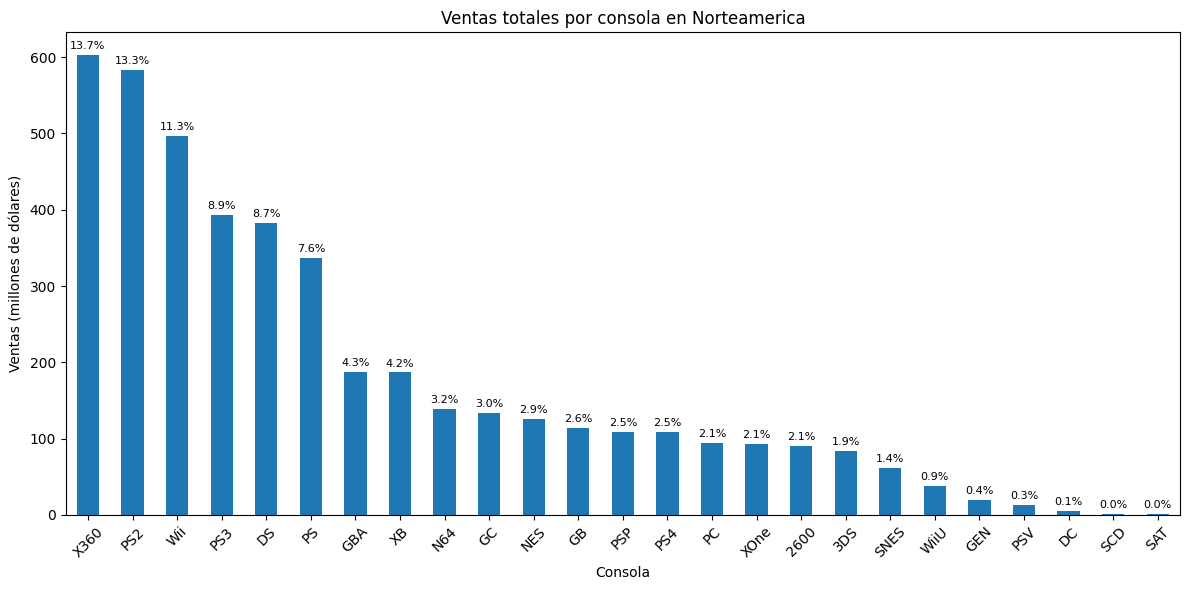

In [71]:
na_ventas = north.groupby('platform')['na_sales'].sum().sort_values(ascending=False)
total_na = na_ventas.sum()
porcentajes4 = (na_ventas / total_na) * 100
ax4 = na_ventas.plot(kind='bar', title='Ventas totales por consola en Norteamerica', 
                         xlabel='Consola', 
                         ylabel='Ventas (millones de dólares)', 
                         figsize=(12, 6) 
                        )

for i, (valor, porcentaje) in enumerate(zip(na_ventas, porcentajes4)):
    ax4.text(i, valor+5, f'{porcentaje:.1f}%', 
             ha='center', 
             va='bottom', 
             fontsize=8 
            )

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

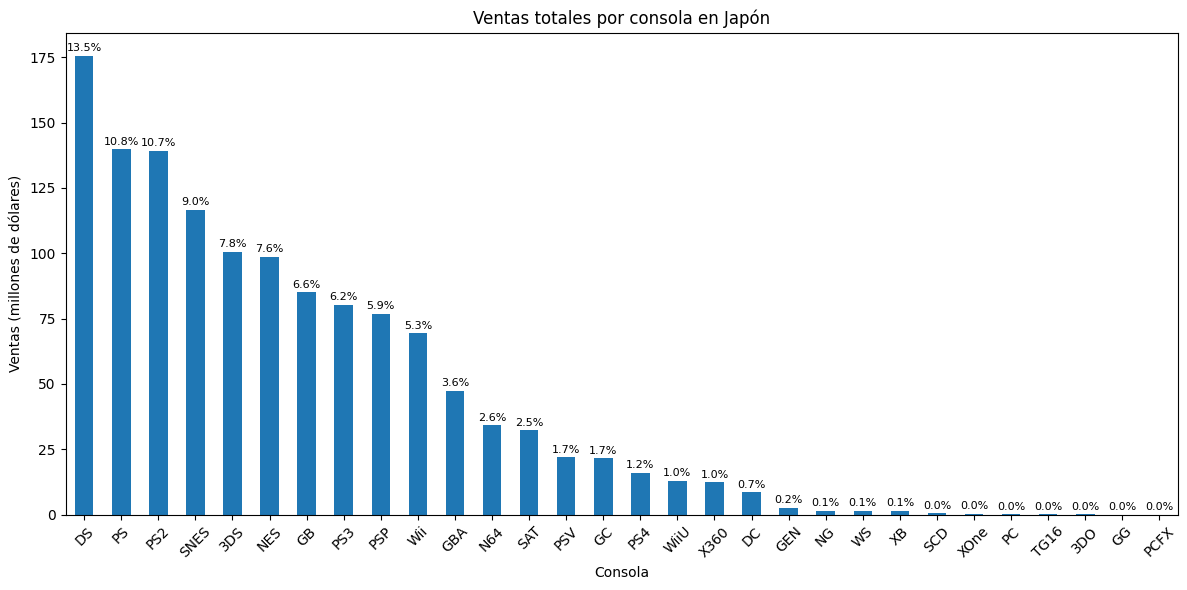

In [72]:
jp_ventas = japon.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)
total_jp = jp_ventas.sum()
porcentajes5 = (jp_ventas / total_jp) * 100
ax5 = jp_ventas.plot(kind='bar', title='Ventas totales por consola en Japón', 
                         xlabel='Consola', 
                         ylabel='Ventas (millones de dólares)', 
                         figsize=(12, 6) 
                        )

for i, (valor, porcentaje) in enumerate(zip(jp_ventas, porcentajes5)):
    ax5.text(i, valor+1, f'{porcentaje:.1f}%', 
             ha='center', 
             va='bottom', 
             fontsize=8 
            )

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

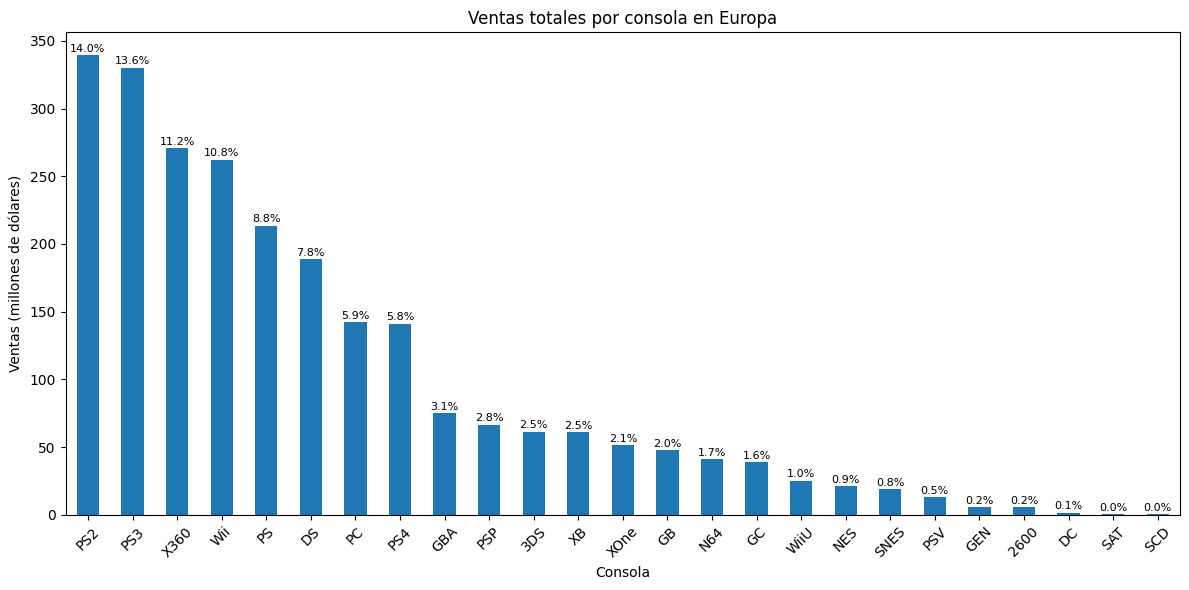

In [73]:
eu_ventas = europa.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)
total_eu = eu_ventas.sum()
porcentajes6 = (eu_ventas / total_eu) * 100
ax6 = eu_ventas.plot(kind='bar', title='Ventas totales por consola en Europa', 
                         xlabel='Consola', 
                         ylabel='Ventas (millones de dólares)', 
                         figsize=(12, 6) 
                        )

for i, (valor, porcentaje) in enumerate(zip(eu_ventas, porcentajes6)):
    ax6.text(i, valor+1, f'{porcentaje:.1f}%', 
             ha='center', 
             va='bottom', 
             fontsize=8 
            )

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Después de analizar las ventas en las distintas regiones, encontramos lo siguiente: 

- Para el caso de norteamerica, vemos que la consola principal es la X360 con una participación en ventas del 13.7%. En segundo lugar tenemos la PS2 (13.3%) y la Wii (11.3%) en tercer lugar. En cuarto y quinto lugar tenemos la PS3 y la DS con una participación de las ventas muy parecida (8.9% y 8.7% respectivamente).

- En Japón vemos que el mercado está totalmente enfocando hacía las marcas nacionales. La principal consola es la Nintendo DS con una participación en las ventas del 13.5%. En segundo y tercer lugar vemos la PS y PS2 de Sony, con una participación en ventas casi iguales (10.8% y 10.7% respectivamente) Y finalizamos con 3 consolas más de Nintendo, SNES, 3DS y NES (9%, 7.8% y 7.6% respectivamente)

- El mercado Europeo es muy parecido al mercado norteamericano, pero la participación en ventas de cada consola varía. En primer lugar tenemos la PS2 (14%) seguida de la PS3 (13.6%). Luego tenemos la X360 y Wii con una participación en ventas muy similares (11.2% y 10.8% respectivamente) y finalizamos con la PS de Sony (8.8%).

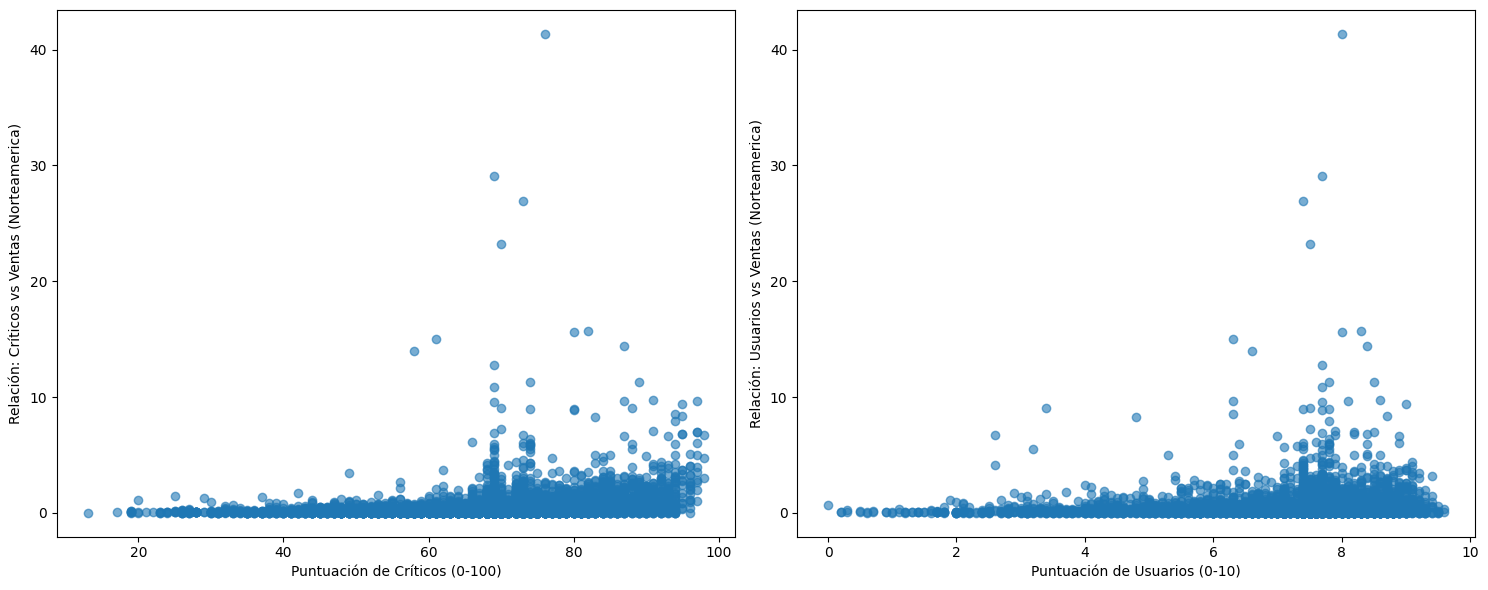

Correlación Críticos-Ventas: 0.198
Correlación Usuarios-Ventas: 0.067


In [83]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.scatter(north['critic_score'], north['na_sales'], alpha=0.6)
plt.xlabel('Puntuación de Críticos (0-100)')
plt.ylabel('Relación: Críticos vs Ventas (Norteamerica)')

plt.subplot(1, 2, 2)
plt.scatter(north['user_score'], north['na_sales'], alpha=0.6)
plt.xlabel('Puntuación de Usuarios (0-10)')
plt.ylabel('Relación: Usuarios vs Ventas (Norteamerica)')

plt.tight_layout()
plt.show()

corr_critic = north['critic_score'].corr(north['na_sales'])
corr_user = north['user_score'].corr(north['na_sales'])

print(f"Correlación Críticos-Ventas: {corr_critic:.3f}")
print(f"Correlación Usuarios-Ventas: {corr_user:.3f}")

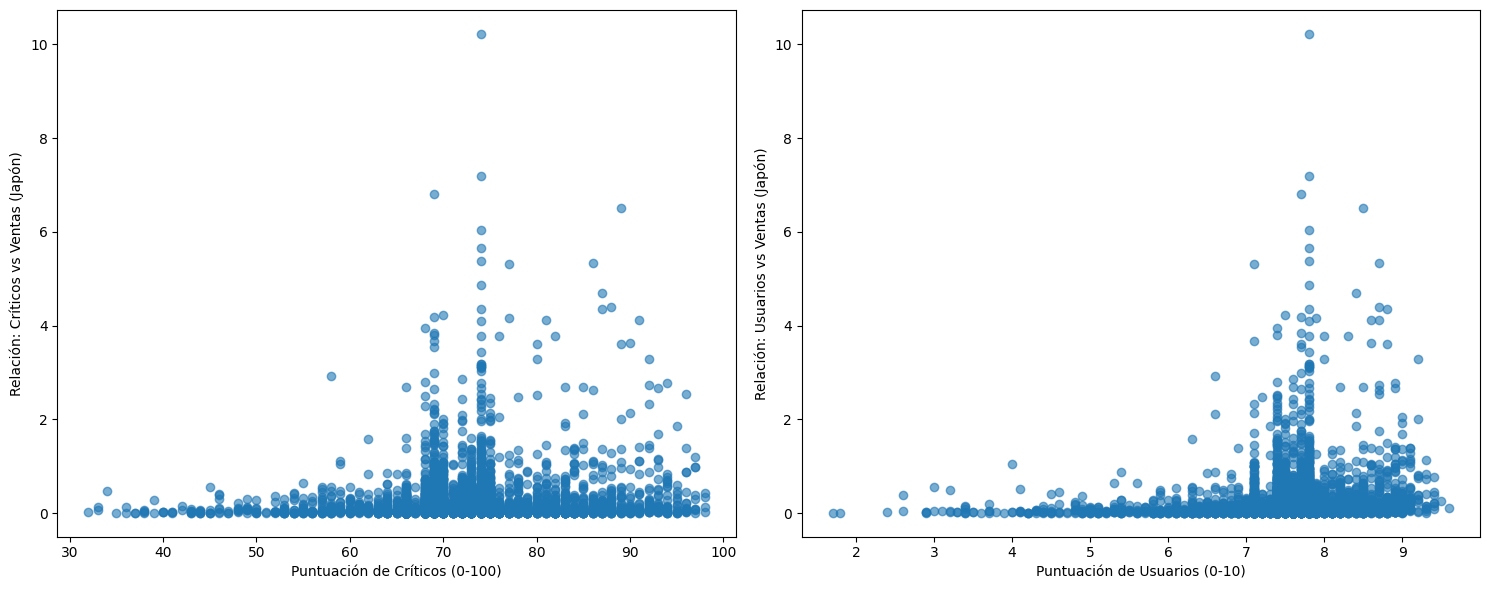

Correlación Críticos-Ventas: 0.131
Correlación Usuarios-Ventas: 0.122


In [75]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.scatter(japon['critic_score'], japon['jp_sales'], alpha=0.6)
plt.xlabel('Puntuación de Críticos (0-100)')
plt.ylabel('Relación: Críticos vs Ventas (Japón)')

plt.subplot(1, 2, 2)
plt.scatter(japon['user_score'], japon['jp_sales'], alpha=0.6)
plt.xlabel('Puntuación de Usuarios (0-10)')
plt.ylabel('Relación: Usuarios vs Ventas (Japón)')

plt.tight_layout()
plt.show()

corr_critic = japon['critic_score'].corr(japon['jp_sales'])
corr_user = japon['user_score'].corr(japon['jp_sales'])

print(f"Correlación Críticos-Ventas: {corr_critic:.3f}")
print(f"Correlación Usuarios-Ventas: {corr_user:.3f}")

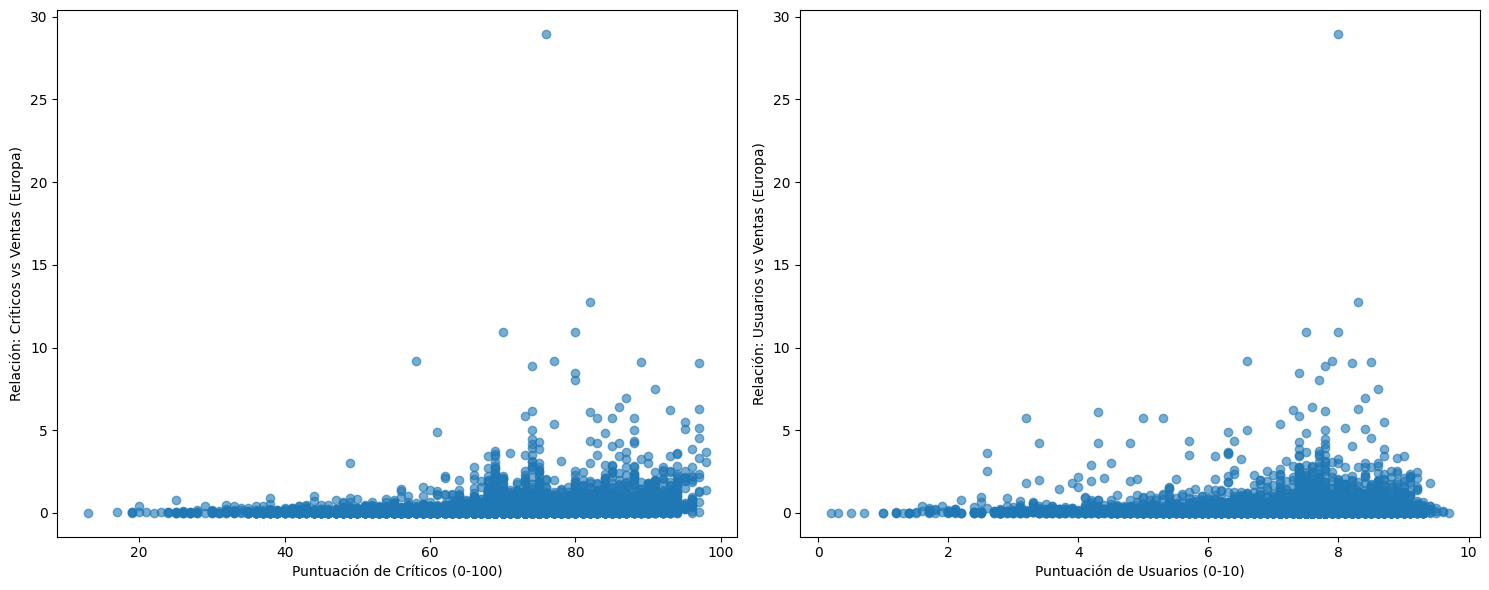

Correlación Críticos-Ventas: 0.194
Correlación Usuarios-Ventas: 0.033


In [76]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.scatter(europa['critic_score'], europa['eu_sales'], alpha=0.6)
plt.xlabel('Puntuación de Críticos (0-100)')
plt.ylabel('Relación: Críticos vs Ventas (Europa)')

plt.subplot(1, 2, 2)
plt.scatter(europa['user_score'], europa['eu_sales'], alpha=0.6)
plt.xlabel('Puntuación de Usuarios (0-10)')
plt.ylabel('Relación: Usuarios vs Ventas (Europa)')

plt.tight_layout()
plt.show()

corr_critic = europa['critic_score'].corr(europa['eu_sales'])
corr_user = europa['user_score'].corr(europa['eu_sales'])

print(f"Correlación Críticos-Ventas: {corr_critic:.3f}")
print(f"Correlación Usuarios-Ventas: {corr_user:.3f}")

Respecto a las calificaciones profesionales y de usuarios en cada una de las regiones, encontramos que hay una relación muy débil entre las ventas y las calificaciones, tanto profesionales, como de los usuarios. En Europea y Norteamerica, las calificaciones de profesionales podrían influir las ventas en un 19%, lo cual no lo hace un criterio muy relevante y no es adecuado concluir que sí se pueden influir las ventas por medio de las calificaciones. En las tres regiones la relación entre las ventas y las calificaciones de los usuarios son más bajas que las de los críticos.

Teniendo en cuenta lo anterior, podemos concluir que las ventas no están determinadas por las calificaciones de los usuarios, pero las calificaciones de los críticos podrían influir muy levemente las ventas de videojuegos en Europa y norteamerica.

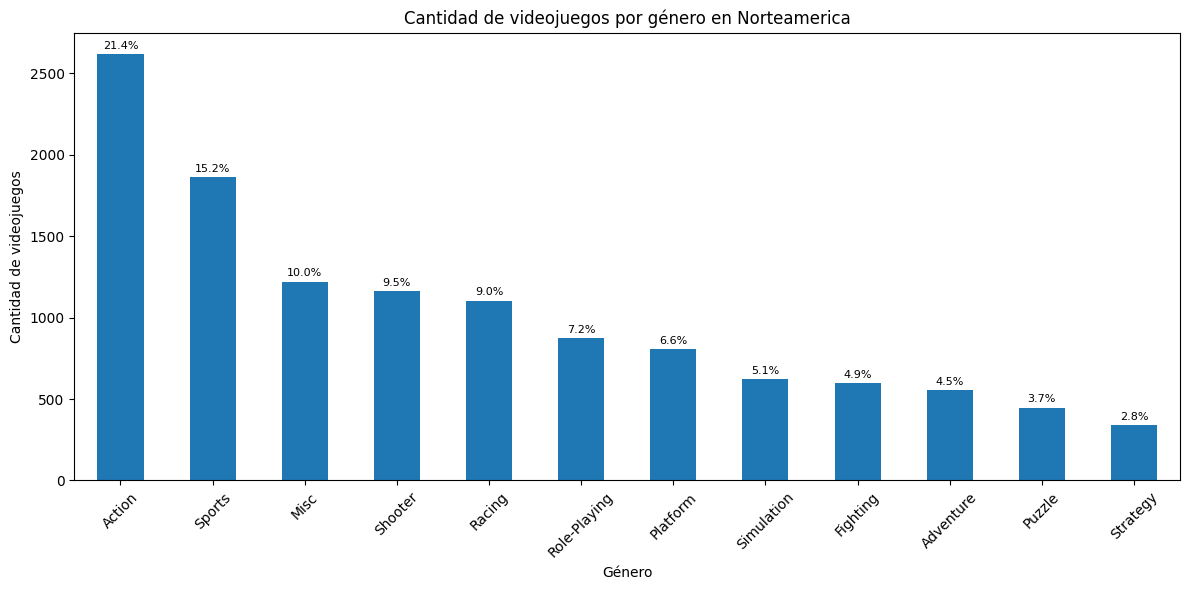

In [109]:
na_genre = north.groupby('genre')['na_sales'].count().sort_values(ascending=False)
totgen_na = na_genre.sum()
porcentajes8 = (na_genre / totgen_na) * 100
ax8 = na_genre.plot(kind='bar', title='Cantidad de videojuegos por género en Norteamerica', 
                         xlabel='Género', 
                         ylabel='Cantidad de videojuegos', 
                         figsize=(12, 6) 
                        )

for i, (valor, porcentaje) in enumerate(zip(na_genre, porcentajes8)):
    ax8.text(i, valor+20, f'{porcentaje:.1f}%', 
             ha='center', 
             va='bottom', 
             fontsize=8 
            )

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

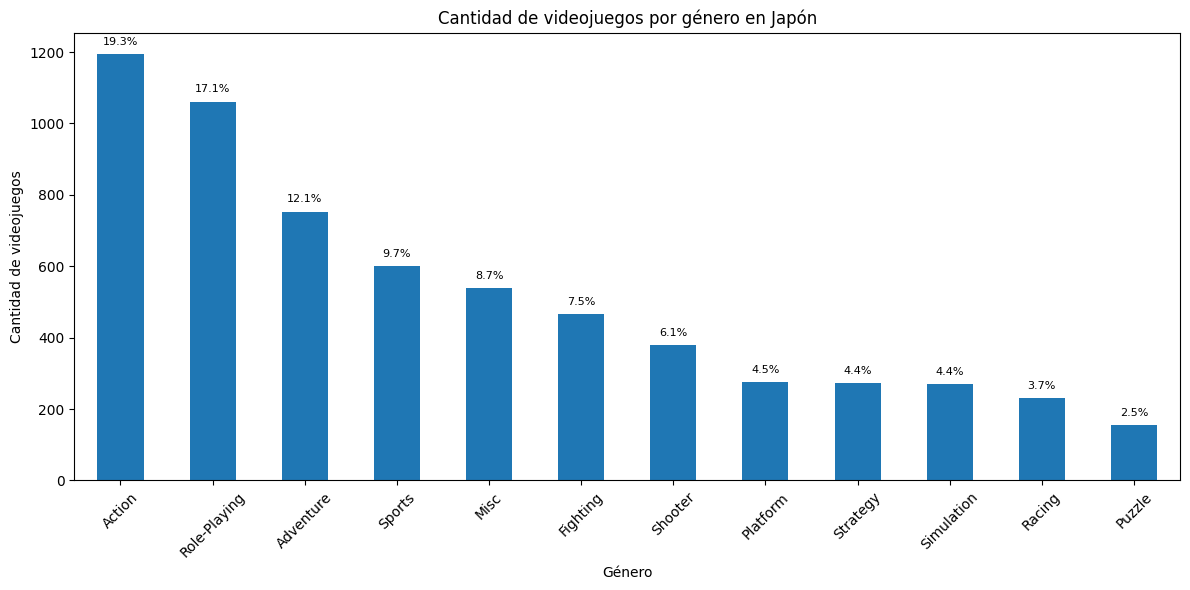

In [110]:
jp_genre = japon.groupby('genre')['jp_sales'].count().sort_values(ascending=False)
totgen_jp = jp_genre.sum()
porcentajes9 = (jp_genre / totgen_jp) * 100
ax9 = jp_genre.plot(kind='bar', title='Cantidad de videojuegos por género en Japón', 
                         xlabel='Género', 
                         ylabel='Cantidad de videojuegos', 
                         figsize=(12, 6) 
                        )

for i, (valor, porcentaje) in enumerate(zip(jp_genre, porcentajes9)):
    ax9.text(i, valor+20, f'{porcentaje:.1f}%', 
             ha='center', 
             va='bottom', 
             fontsize=8 
            )

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

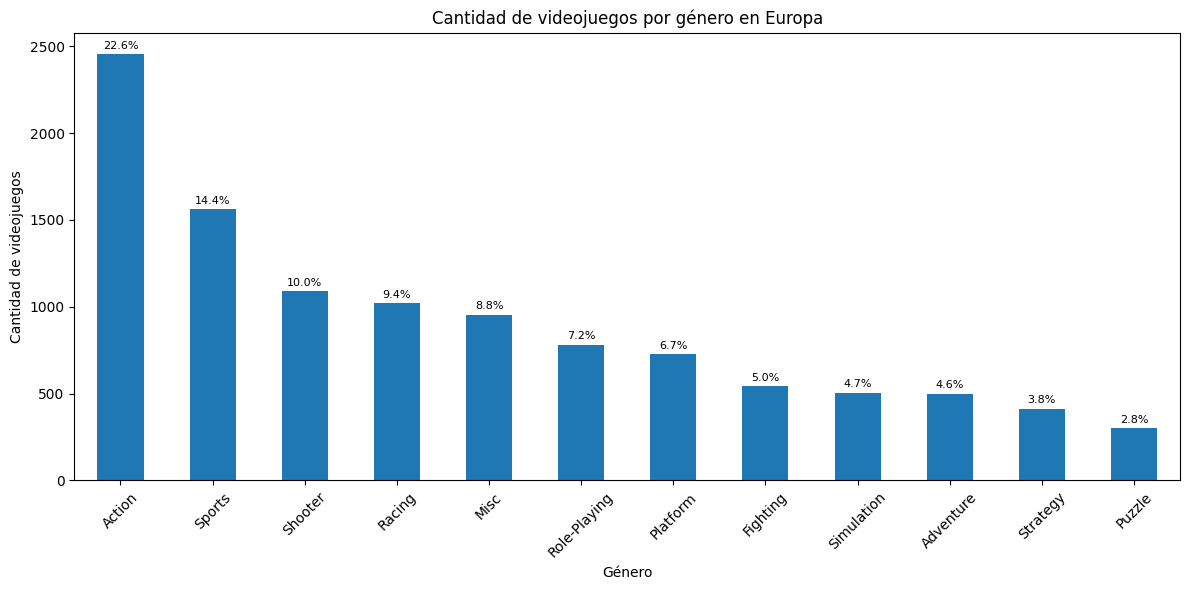

In [111]:
eu_genre = europa.groupby('genre')['eu_sales'].count().sort_values(ascending=False)
totgen_eu = eu_genre.sum()
porcentajes10 = (eu_genre / totgen_eu) * 100
ax10 = eu_genre.plot(kind='bar', title='Cantidad de videojuegos por género en Europa', 
                         xlabel='Género', 
                         ylabel='Cantidad de videojuegos', 
                         figsize=(12, 6) 
                        )

for i, (valor, porcentaje) in enumerate(zip(eu_genre, porcentajes10)):
    ax10.text(i, valor+20, f'{porcentaje:.1f}%', 
             ha='center', 
             va='bottom', 
             fontsize=8 
            )

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

La distribución de género en cada una de las regiones es variada, pero encontramos algunas similitudes:

- En norteamerica, el género principal es acción (21.4%) seguido de deportes (15.2%). Luego encontramos los géneros miscelaneos, disparo y carreras con un porcentaje similar (10%, 9.5% y 9% respectivamente)

- En Japón tenemos el género de acción en primer lugar (19.3%), seguido de los juegos de rol (17.1%), aventura (12.1%) deportes (9.7%) y miscelaneos (8.7%)

- Finalmente, en Europa tenemos el género acción en primer lugar (22.6%) seguido de deportes (14.4%). Luego tenemos los géneros disparo, carreras y miscelaneos con unos porcentajes similares (10%, 9.4% y 8.8% respectivamente)

Podemos decir que el género acción es el más importante porque tiene una mayor cantidad de videojuegos en las tres regiones. Luego tendríamos los géneros de deportes y miscelaneos como los dos siguientes géneros más relevantes en las tres regiones. Cada región tiene su particularidad.

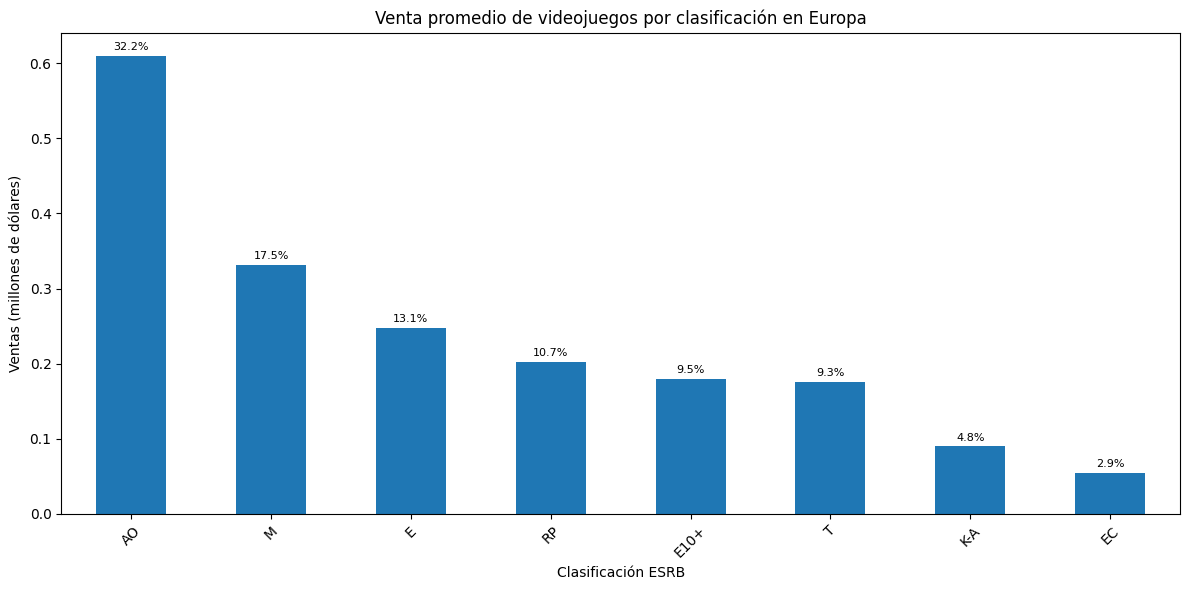

In [114]:
eu_esrb = europa.groupby('rating')['eu_sales'].mean().sort_values(ascending=False)
totes_eu = eu_esrb.sum()
porcentajes11 = (eu_esrb / totes_eu) * 100
ax11 = eu_esrb.plot(kind='bar', title='Venta promedio de videojuegos por clasificación en Europa', 
                         xlabel='Clasificación ESRB', 
                         ylabel='Ventas (millones de dólares)', 
                         figsize=(12, 6) 
                        )

for i, (valor, porcentaje) in enumerate(zip(eu_esrb, porcentajes11)):
    ax11.text(i, valor+0.005, f'{porcentaje:.1f}%', 
             ha='center', 
             va='bottom', 
             fontsize=8 
            )

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

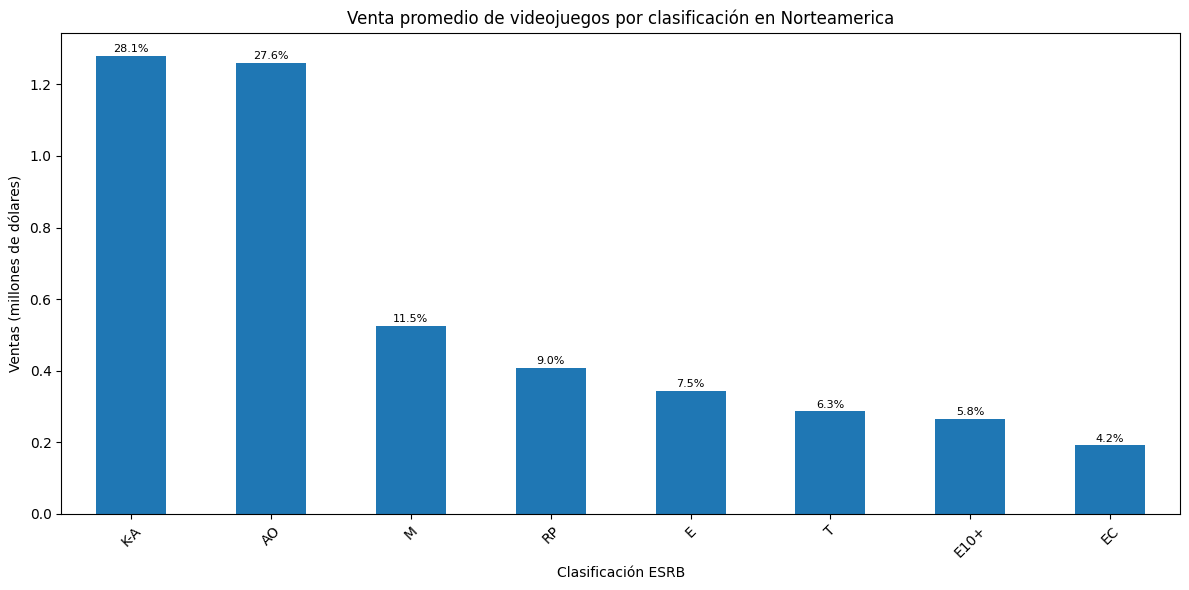

In [116]:
na_esrb = north.groupby('rating')['na_sales'].mean().sort_values(ascending=False)
totes_na = na_esrb.sum()
porcentajes12 = (na_esrb / totes_na) * 100
ax12 = na_esrb.plot(kind='bar', title='Venta promedio de videojuegos por clasificación en Norteamerica', 
                         xlabel='Clasificación ESRB', 
                         ylabel='Ventas (millones de dólares)', 
                         figsize=(12, 6) 
                        )

for i, (valor, porcentaje) in enumerate(zip(na_esrb, porcentajes12)):
    ax12.text(i, valor+0.005, f'{porcentaje:.1f}%', 
             ha='center', 
             va='bottom', 
             fontsize=8 
            )

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

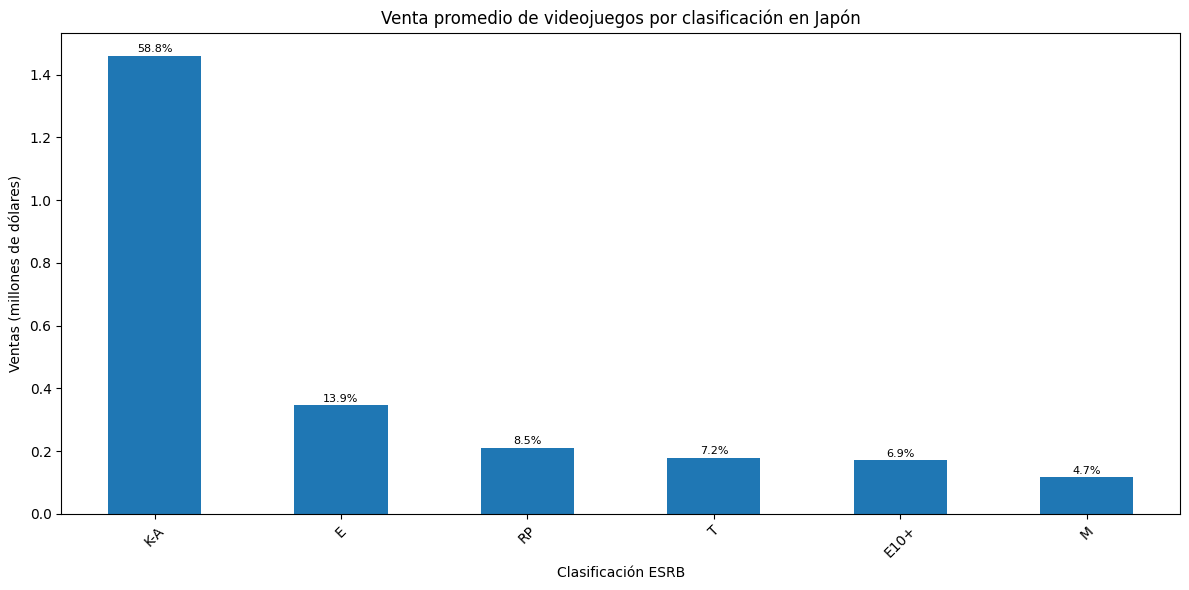

In [117]:
jp_esrb = japon.groupby('rating')['jp_sales'].mean().sort_values(ascending=False)
totes_jp = jp_esrb.sum()
porcentajes13 = (jp_esrb / totes_jp) * 100
ax13 = jp_esrb.plot(kind='bar', title='Venta promedio de videojuegos por clasificación en Japón', 
                         xlabel='Clasificación ESRB', 
                         ylabel='Ventas (millones de dólares)', 
                         figsize=(12, 6) 
                        )

for i, (valor, porcentaje) in enumerate(zip(jp_esrb, porcentajes13)):
    ax13.text(i, valor+0.005, f'{porcentaje:.1f}%', 
             ha='center', 
             va='bottom', 
             fontsize=8 
            )

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Prueba de hipótesis

Prueba las siguientes hipótesis:

— Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

H₀ --> "Las calificaciones son las mismas"

H₁ --> "Hay una diferencia significativa entre las calificaciones de usuarios para Xbox One y PC"

alpha = 0.05 (95% de probabilidad)

— Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

H₀ --> "Las calificaciones son las mismas"

H₁ --> "Hay una diferencia significativa entre las calificaciones de usuarios para los géneros acción y deportes"

alpha = 0.05 (95% de probabilidad)

*La hipotesis nula se formula asumiendo que las dos variables a analizar son iguales. La hipotesis alterniativa se construye como lo opuesto a esto, es decir, que existe alguna diferencia. Se establece el umbral de alpha = 0.05 para trabajar con una probabilidad de 95% de certeza*

In [86]:
calificaciones_XOne = df_games[df_games['platform'] == 'XOne']['user_score']
calificaciones_PC = df_games[df_games['platform'] == 'PC']['user_score']

estadistico, p_valor = st.levene(calificaciones_XOne, calificaciones_PC)
print(f"Estadístico de Levene: {estadistico:.4f}, p_valor: {p_valor}")

resultado1 = st.ttest_ind(calificaciones_XOne, calificaciones_PC)
print(f"Estadístico t: {resultado1.statistic:.4f}")
print(f"Valor p: {resultado1.pvalue}")

Estadístico de Levene: 0.3978, p_valor: 0.5283523839400621
Estadístico t: -4.1514
Valor p: 3.5341366694379986e-05


p es menor que 0.05, por lo tanto rechazamos la hipotesis nula. Esto quiere decir que sí hay una diferencia significativa entre las calificaciones de las dos plataformas.

In [87]:
calificaciones_action = df_games[df_games['genre'] == 'Action']['user_score']
calificaciones_sports = df_games[df_games['genre'] == 'Sports']['user_score']

estadistico, p_valor = st.levene(calificaciones_action, calificaciones_sports)
print(f"Estadístico de Levene: {estadistico:.4f}, p_valor: {p_valor}")

resultado2 = st.ttest_ind(calificaciones_action, calificaciones_sports)
print(f"Estadístico t: {resultado2.statistic:.4f}")
print(f"Valor p: {resultado2.pvalue}")

Estadístico de Levene: 0.1240, p_valor: 0.724746253871138
Estadístico t: 0.5969
Valor p: 0.550578986944305


p es mayor que 0.05, por lo tanto aceptamos la hipotesis nula. Esto quiere decir que las calificaciones de usuarios de los dos géneros son las mismas, con una certeza del 95%.

*Se utiliza el ttest para comparar las medidas de los dos grupos. Para poder determinar si las varianzas son iguales, utilizamos el test de Levene (resultado p > 0.05, equal_var=True). Este test permite determinar la diferencia estadística entre los dos grupos y por eso es el más adecuado para este caso.*

## Conclusión

*Conclusiones sobre el análisis de los datos*

A continuación menciono las principales conclusiones a las que se puede llegar para tener en la proyección del año 2017:

* Hay una alta probabilidad de Nintendo lance una nueva consola portátil en 2017 para enfocarse más en este mercado donde está teniendo un posicionamiento muy fuerte. Es posible que tenga una postura conservadora respecto a su consola WiiU.

* Sony y Microsoft se enfocarán en posicionar sus últimas consolas, PlayStation4 y XboxOne, respectivamente. Es posible que Sony enfoque algo de esfuerzo en su consola portátil PSV, aunque lo más probable es que se dedique de lleno al PS4 la cuál ya está sacando ventaja frente a la competencia directa Xbox One.

* Todas las consolas se enfocarán en los géneros más populares: acción, deportes, carreras y juegos de disparo. Sony podría tener un enfoque muy fuerte en el género de juegos de rol como ya lo ha venido haciendo con las consolas anteriores, y porque este género representa un porcentaje importante del total de ventas de videojuegos.

* Después del análisis de datos, podemos decir que las ventas de los videojuegos están levemente relacionadas con las calificaciones profesionales para el mercado europeo y norteamericano y, por el contrario, no tienen ninguna relación con la calificación de los usuarios en todas las regiones. Para el caso de Japón. Las ventas no están relacionadas con las calificaciones ni de críticos, ni de los usuarios.

*Conclusiones generales*

El ejercicio se realizó con datos viejos de videojuegos, un tema que me gusta personalmente, y es increíble ver como un análisis de datos puede arrojar conclusiones que no están alejadas de lo que pasó en esos años respecto a la "batalla de consolas" en el mundo de videojuegos. Claramente hay que tener mucho cuidado con los sesgos al momento de analizar, y hay que basarse en los resultados obtenidos, no en los que se quisieran obtener. Excelente proyecto.